<a href="https://colab.research.google.com/github/JoaoVitorSesma/cs50-Final-Project/blob/main/Survival_Prediction_of_Patients_with_Colorectal_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#<font size="6.9" color=#EEDD82 face="Times New Roman">**Survival Prediction of Patients with Colorectal Cancer**</font>

## <font color=#FFB90F>**Imports**

In [1]:
# Importing the Main Libraries
## Data manipulation libraries
import pandas as pd
import numpy as np

## Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## <font color=#FFB90F>**Data transforming**

In [ ]:
# ! pip install dbfread --quiet

In [ ]:
# # Importação do Arquivo DBF - ENABLE ACCESS
# ! gdown 'https://drive.google.com/uc?id=1B6kgEuVFIYAwNxnAMbuI9pyvXS7kOye4' -O 'Base_de_Dados(FOSP-GERAL).dbf' --quiet

In [ ]:
# # Required imports for reading DBF files
# from dbfread import DBF
# import os

# # Path to the DBF file - ENABLE ACCESS
# dbf_path = '/content/Base_de_Dados(FOSP-GERAL).dbf'

# # Using the dbfread library to load the DBF file.
# # 'load=True' loads all records immediately to prevent potential reading issues.
# # 'encoding=latin1' ensures that special characters are interpreted correctly.
# dbf_table = DBF(dbf_path, load=True, encoding='latin1')

# # Converting the DBF data to a pandas DataFrame
# df = pd.DataFrame(iter(dbf_table))

# # Path to save the CSV file
# csv_path = '/content/pacigeral_jun24.csv'

# # Creating the directory if it does not exist to avoid errors when saving the CSV file
# os.makedirs(os.path.dirname(csv_path), exist_ok=True)

# # Saving the DataFrame in CSV format
# df.to_csv(csv_path, index=False, encoding='latin1')

## <font color=#FFB90F>**Data Visualization**

In [2]:
# Database Import
!gdown 1KG9LxFsSeyEomMAtEi_m54QGBFjwcMNT --quiet

In [3]:
# Assigning the name "df" to the database
df = pd.read_csv('/content/pacigeral_jun24.csv', low_memory=False)

In [4]:
# Viewing the size of the DataFrame
print(df.shape)

(1211630, 105)


In [5]:
# Viewing the first 3 rows of the DataFrame
display(df.head(3))

,INSTITU,DSCINST,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,...,REC04,IBGEATEN,DRSINST,RRASINST,CIDADEINST,HABILIT,HABIT11,HABILIT1,HABILIT2,CIDADEH
0,22950,HOSP CLINICAS DE MARILIA,3,78,2,SP,SP,3534500,OSCAR BRESSANE,2,...,NaN,3529005,DRS 09 - Marilia,RRAS 10,MARILIA,7,CACON com Serviço de Oncologia Pediátrica,3,2,Marilia
1,612374,ICESP,3,49,1,BA,BA,2930709,SIMOES FILHO,2,...,NaN,3550308,DRS 01 - Grande Sao Paulo,RRAS 06,SAO PAULO,6,CACON,3,2,São Paulo
2,9326,UNICAMP,9,50,1,SP,SP,3531209,MONTE ALEGRE DO SUL,2,...,NaN,3509502,DRS 07 - Campinas,RRAS 15,CAMPINAS,6,CACON,3,2,Campinas


## <font color=#FFB90F>**Data Preparation**

### <font color=#Chocolate>**Selections**

#### <font color=#00FF00> **Selection 1 - Topography Group - Colorectal**

In [6]:
# TOPOGRUP column display
df['TOPOGRUP'].value_counts().sort_index()

,count
TOPOGRUP,
C00,3625
C01,5729
C02,9032
C03,1245
C04,4273
...,...
C74,1370
C75,931
C76,4484


In [7]:
# Viewing all types of topographies in order
np.sort(df['TOPOGRUP'].unique())

array(['C00', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08',
       'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17',
       'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26',
       'C30', 'C31', 'C32', 'C33', 'C34', 'C37', 'C38', 'C39', 'C40',
       'C41', 'C42', 'C44', 'C47', 'C48', 'C49', 'C50', 'C51', 'C52',
       'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C60', 'C61', 'C62',
       'C63', 'C64', 'C65', 'C66', 'C67', 'C68', 'C69', 'C70', 'C71',
       'C72', 'C73', 'C74', 'C75', 'C76', 'C77', 'C80'], dtype=object)

In [8]:
# Colorectal Topography (C18, C19, C20)
df_colo = df[df.TOPOGRUP.isin(['C18', 'C19', 'C20'])]
df_colo.TOPOGRUP.value_counts()

,count
TOPOGRUP,
C18,46982
C20,35434
C19,6047


In [9]:
# DataFrame new size
df_colo.shape

(88463, 105)

#### <font color=	#00FF00> **Selection 2 - State of Residence**

In [10]:
# UFRESID column display
df['UFRESID'].value_counts()

,count
UFRESID,
SP,1126974
MG,32409
GO,11566
MS,10379
MT,7311
RO,4078
PA,2267
BA,2086
PR,1971


In [11]:
# Viewing all city types in order
np.sort(df['UFRESID'].unique())

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'OP', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO',
       'RR', 'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [12]:
# Residents of SP
df_colo = df_colo[df_colo.UFRESID == 'SP']
df_colo.UFRESID.value_counts()

,count
UFRESID,
SP,83211


In [13]:
# New DataFrame size
df_colo.shape

(83211, 105)

#### <font color=	#00FF00> **Seleção 3 - Basis of Diagnosis**

In [14]:
# UFRESID column display
df['BASEDIAG'].value_counts().sort_index()

,count
BASEDIAG,
1,2329
2,18946
3,1189221
9,1134


In [15]:
# Viewing all city types in order
np.sort(df['BASEDIAG'].unique())

array([1, 2, 3, 9])

In [16]:
# Selection of cases with Microscopic Confirmation
df_colo = df_colo[df_colo.BASEDIAG == 3]
df_colo.BASEDIAG.value_counts()

,count
BASEDIAG,
3,82272


In [17]:
# New DataFrame format
df_colo.shape

(82272, 105)

#### <font color=	#00FF00>**Selection 4 - Clinical internship**

In [18]:
# ECGRUP column display
df['ECGRUP'].value_counts().sort_index()

,count
ECGRUP,
0,67121
I,346493
II,224668
III,168883
IV,200023
X,51844
Y,152598


In [19]:
# Viewing all types of clinical internships in order
np.sort(df['ECGRUP'].unique())

array(['0', 'I', 'II', 'III', 'IV', 'X', 'Y'], dtype=object)

In [20]:
# Selection of clinical internship groups
df_colo = df_colo[df_colo.ECGRUP.isin(['I', 'II', 'III', 'IV'])]
df_colo.ECGRUP.value_counts().sort_index()

,count
ECGRUP,
I,9785
II,21501
III,23857
IV,19948


In [21]:
# New DataFrame format
df_colo.shape

(75091, 105)

#### <font color=	#00FF00>**Selection 5 - Morphology - Adenocarcinoma**

In [22]:
# Viewing the MORFO column
df['MORFO'].value_counts().sort_index()

,count
MORFO,
80001,501
80003,11749
80011,63
80013,80
80023,115
...,...
99853,18
99863,22
99873,40


In [23]:
# Viewing all morphology types in order
np.sort(df['MORFO'].unique())

array([80001, 80003, 80011, 80013, 80023, 80033, 80043, 80053, 80102,
       80103, 80113, 80123, 80133, 80143, 80153, 80203, 80213, 80223,
       80303, 80313, 80323, 80333, 80343, 80353, 80401, 80413, 80423,
       80433, 80443, 80453, 80463, 80502, 80503, 80513, 80522, 80523,
       80702, 80703, 80713, 80723, 80733, 80743, 80753, 80762, 80763,
       80772, 80783, 80812, 80823, 80833, 80843, 80901, 80903, 80913,
       80923, 80933, 80943, 80953, 80973, 80983, 81023, 81103, 81201,
       81202, 81203, 81211, 81213, 81223, 81233, 81243, 81301, 81302,
       81303, 81313, 81401, 81402, 81403, 81413, 81423, 81433, 81443,
       81453, 81473, 81482, 81501, 81503, 81513, 81521, 81523, 81531,
       81533, 81543, 81561, 81603, 81613, 81623, 81703, 81713, 81723,
       81733, 81743, 81753, 81803, 81903, 82003, 82012, 82013, 82102,
       82103, 82113, 82143, 82153, 82203, 82213, 82302, 82303, 82313,
       82401, 82403, 82413, 82421, 82423, 82433, 82443, 82451, 82453,
       82463, 82473,

In [24]:
# Selection of cases with adenocarcinoma morphology (81403)
df_colo = df_colo[df_colo.MORFO == 81403]
df_colo.MORFO.value_counts()

,count
MORFO,
81403,43735


In [25]:
# New DataFrame format
df_colo.shape

(43735, 105)

#### <font color=	#00FF00>**Selection 6 - Year of Diagnosis**

In [26]:
# ANODIAG column display
df['ANODIAG'].value_counts().sort_index()

,count
ANODIAG,
2000,28276
2001,31292
2002,34667
2003,36149
2004,38915
2005,42813
2006,41950
2007,43495
2008,47554


In [27]:
# Viewing all years in order
np.sort(df['ANODIAG'].unique())

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024])

In [28]:
# Selection of the year of diagnosis until 2020
df_colo = df_colo[~(df_colo.ANODIAG > 2020)]
df_colo.ANODIAG.value_counts().sort_index(ascending=False)

,count
ANODIAG,
2020,2209
2019,2445
2018,2341
2017,2200
2016,2282
2015,2295
2014,2258
2013,2252
2012,2223


In [29]:
# New DataFrame format
df_colo.shape

(37665, 105)

#### <font color=	#00FF00>**Seleção 7 - Age**

In [30]:
# Viewing the AGE column
df['IDADE'].value_counts().sort_index()

,count
IDADE,
0,2188
1,2235
2,2161
3,2076
4,1673
...,...
106,5
107,3
109,1


In [31]:
# Viewing all ages in order
np.sort(df['IDADE'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 109, 113, 114])

In [32]:
# Selection of ages over 19 years old
df_colo = df_colo[df_colo.IDADE > 19]
df_colo.IDADE.value_counts().sort_index(ascending=False)

,count
IDADE,
100,3
99,3
98,1
97,7
96,6
...,...
24,39
23,18
22,24


In [33]:
# New DataFrame format
df_colo.shape

(37631, 105)

### <font color=#Chocolate>**Column Adjustments**

#### <font color=#00FF00> **Setting 1.1 - Extract DRS number**

In [34]:
# Viewing DRS - Regional Health Departments
df['DRS'].value_counts().sort_index()

,count
DRS,
DRS 01 Grande Sao Paulo,467694
DRS 02 Aracatuba,27644
DRS 03 Araraquara,29179
DRS 04 Baixada Santista,25874
DRS 05 Barretos,32254
DRS 06 Bauru,99078
DRS 07 Campinas,80931
DRS 08 Franca,16892
DRS 09 Marilia,46408


In [35]:
# Selection of DRS number and placed in a new column
drs_expand = df_colo.DRS.str.split(' ', expand=True)
df_colo['nDRS'] = drs_expand[1].astype(int)
df_colo['nDRS'].value_counts()

,count
nDRS,
1,15685
7,3856
15,2061
10,1869
6,1854
17,1848
16,1400
13,1301
2,1300


#### <font color=#00FF00> **Setting 1.2 - Extract the DRSINST number**

In [36]:
# Viewing DRS - Regional Departments of Institutional Health
df['DRSINST'].value_counts().sort_index()

,count
DRSINST,
DRS 01 - Grande Sao Paulo,515564
DRS 02 - Aracatuba,7200
DRS 03 - Araraquara,9712
DRS 04 - Baixada Santista,16165
DRS 05 - Barretos,169631
DRS 06 - Bauru,168252
DRS 07 - Campinas,84752
DRS 08 - Franca,5718
DRS 09 - Marilia,23452


In [37]:
# Selection of DRSINST number and placed in a new column
drs_expand = df_colo.DRSINST.str.split(' ', expand=True)
df_colo['nDRSINST'] = drs_expand[1].astype(int)
df_colo['nDRSINST'].value_counts()

,count
nDRSINST,
1,16642
7,3641
5,3424
6,2786
10,1767
17,1690
15,1434
13,1240
4,850


#### <font color=#00FF00> **Adjustment 2 - Recalculate and categorize CONSDIAG, DIAGTRAT and TRATCONS**

In [38]:
# Viewing the CONSDIAG column
df['CONSDIAG'].value_counts().sort_index()

,count
CONSDIAG,
0,195233
1,47872
2,22063
3,19671
4,16953
...,...
7444,1
8113,1
8302,1


In [39]:
# DIAGTRAT column display
df['DIAGTRAT'].value_counts().sort_index()

,count
DIAGTRAT,
0.0,350216
1.0,11065
2.0,6031
3.0,4979
4.0,4553
...,...
6986.0,1
7243.0,1
7446.0,1


In [40]:
# TRATCONS column view
df['TRATCONS'].value_counts().sort_index()

,count
TRATCONS,
0.0,114002
1.0,33012
2.0,14614
3.0,12158
4.0,11274
...,...
6575.0,1
6998.0,1
7132.0,1


In [41]:
# Transforming selected columns to datetime model
list_datas = ['DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTULTINFO']

for col_data in list_datas:
    df_colo[col_data] = pd.to_datetime(df_colo[col_data])

df_colo[list_datas].dtypes

# Transforming columns to format days
df_colo['CONSDIAG'] = (df_colo.DTDIAG - df_colo.DTCONSULT).dt.days
df_colo['DIAGTRAT'] = (df_colo.DTTRAT - df_colo.DTDIAG).dt.days
df_colo['TRATCONS'] = (df_colo.DTTRAT - df_colo.DTCONSULT).dt.days

In [42]:
# Accounting for null values
df_colo[['DIAGTRAT', 'TRATCONS']].isna().sum()

,0
DIAGTRAT,1787
TRATCONS,1787


In [43]:
# Handling null data
df_colo[['DIAGTRAT', 'TRATCONS']] = df_colo[['DIAGTRAT', 'TRATCONS']].fillna(-1)
df_colo[['DIAGTRAT', 'TRATCONS']].isna().sum()

,0
DIAGTRAT,0
TRATCONS,0


In [44]:
# Categorization 1
df_colo['CONSDIAG_CAT'] = [0 if consdiag <= 30 else 1 if consdiag <= 60 else 2 for consdiag in df_colo.CONSDIAG]
df_colo['CONSDIAG_CAT'].value_counts()

,count
CONSDIAG_CAT,
0,34169
1,1820
2,1642


In [45]:
# Categorization 2
df_colo['TRATCONS_CAT'] = [3 if tratcons < 0 else 0 if tratcons <= 60 else 1 if tratcons <= 90 else 2 for tratcons in df_colo.TRATCONS]
df_colo['TRATCONS_CAT'].value_counts()

,count
TRATCONS_CAT,
0,26832
2,4785
1,4227
3,1787


In [46]:
# Categorization 3
df_colo['DIAGTRAT_CAT'] = [3 if diagtrat < 0 else 0 if diagtrat <= 60 else 1 if diagtrat <= 90 else 2 for diagtrat in df_colo.DIAGTRAT]
df_colo['DIAGTRAT_CAT'].value_counts()

,count
DIAGTRAT_CAT,
0,22049
2,8097
1,5698
3,1787


### <font color=#Chocolate>**Creating Columns**

#### <font color=#00FF00> **Creation 1 - Latest information - ULTIDIAG**

In [47]:
# Creation of a new column to know the time of the last information
df_colo['ULTIDIAG'] = (df_colo.DTULTINFO - df_colo.DTDIAG).dt.days
df_colo['ULTIDIAG'].value_counts(dropna=False).sort_index()

,count
ULTIDIAG,
-718,1
0,155
1,67
2,85
3,56
...,...
8636,1
8692,1
8694,1


#### <font color=#00FF00> **Creation 2 - Presence of Metastasis - PRESENCA_META**

In [48]:
# Creation of a new column to find out if there was metastasis in patients
df_colo['PRESENCA_META'] = 0 # Não houve
df_colo.loc[df_colo.META01.notnull(), 'PRESENCA_META'] = 1 # Houve
df_colo['PRESENCA_META'].value_counts()

,count
PRESENCA_META,
0,27028
1,10603


In [49]:
# Metastasis column visualization
df_colo.META01.value_counts(dropna=False).sort_index()

,count
META01,
C02,1
C06,51
C07,3
C09,1
C13,3
C15,1
C16,21
C17,34
C18,24


#### <font color=#00FF00> **Creation 3 - Presence of Recurrence - PRESENCA_REC**

In [50]:
# Creation of a new column to find out if there was a recurrence in patients
df_colo['PRESENCA_REC'] = 0 # Não houve
df_colo.loc[df_colo.REC01.notnull(), 'PRESENCA_REC'] = 1 # Houve

df_colo['PRESENCA_REC'].value_counts()

,count
PRESENCA_REC,
0,32846
1,4785


In [51]:
# Viewing the recidivism column
df_colo.REC01.value_counts(dropna=False).sort_index()

,count
REC01,
C00,1
C13,1
C15,1
C16,7
C17,21
C18,49
C19,3
C20,93
C21,8


### <font color=#Chocolate>**Column removal**

In [52]:
# List of columns to be removed
list_drop = ['DSCINST', 'UFNASC', 'UFRESID', 'CIDADE', 'DTCONSULT', 'CLINICA', 'DTDIAG',
 'BASEDIAG', 'TOPOGRUP', 'DESCTOPO', 'MORFO', 'DESCMORFO', 'CIDO', 'DESCIDO',
 'T', 'N', 'M', 'PT', 'PN', 'PM', 'S', 'G', 'LOCALTNM', 'IDMITOTIC', 'PSA',
 'GLEASON', 'OUTRACLA', 'META01', 'META02', 'META03', 'META04', 'DTTRAT',
 'NAOTRAT', 'TRATAMENTO', 'TRATHOSP', 'TRATFANTES', 'TRATFAPOS', 'NENHUMANT',
 'CIRURANT', 'RADIOANT', 'QUIMIOANT', 'HORMOANT', 'TMOANT', 'IMUNOANT',
 'OUTROANT', 'NENHUMAPOS', 'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS', 'HORMOAPOS',
 'TMOAPOS', 'IMUNOAPOS', 'OUTROAPOS', 'DTULTINFO', 'CONSDIAG', 'TRATCONS',
 'DIAGTRAT', 'CICI', 'CICIGRUP', 'CICISUBGRU', 'FAIXAETAR', 'LATERALI',
 'INSTORIG', 'DRS', 'RRAS', 'PERDASEG', 'ERRO', 'DTRECIDIVA', 'RECNENHUM',
 'RECLOCAL', 'RECREGIO', 'RECDIST', 'REC01', 'REC02', 'REC03', 'REC04',
 'HABILIT', 'HABIT11', 'HABILIT1', 'DRSINST', 'RRASINST', 'CIDADEINST', 'CIDADEH']

# Drop the columns to be removed
df_colo = df_colo.drop(columns=list_drop)

# New format display
df_colo.head(3)
print(df_colo.shape)

(37631, 30)


### <font color=#Chocolate>**Output Column**

#### <font color=#00FF00> **Creation of the column of deaths due to generalized reasons**

In [53]:
# View the column with the latest information
df_colo.ULTINFO.value_counts().sort_index()

,count
ULTINFO,
1,3759
2,11403
3,16781
4,5688


In [54]:
# Creation of a new column with only deaths of all types
df_colo['obito_geral'] = 0 # Não houve
df_colo.loc[df_colo.ULTINFO > 2, 'obito_geral'] = 1 # Houve
df_colo['obito_geral'].value_counts()

,count
obito_geral,
1,22469
0,15162


#### <font color=#00FF00> **Creation of the 3-year survival column**

In [55]:
# Creation of a new column with only patients who died after 3 years
df_colo['sobrevida_3anos'] = 0 # Não houve
df_colo.loc[df_colo.ULTIDIAG > 3*365, 'sobrevida_3anos'] = 1 # Houve
df_colo['sobrevida_3anos'].value_counts()

,count
sobrevida_3anos,
0,20082
1,17549


#### <font color=#00FF00> **Final selection of patients who have information for at least 3 years**

In [56]:
# Filters out rows where both 'obito_geral' and 'sobrevida_3anos' are 0.
df_colo_ano3 = df_colo[~((df_colo.obito_geral == 0) & (df_colo.sobrevida_3anos == 0))]
df_colo_ano3.shape

(33623, 32)

### <font color=#Chocolate>**DataFrame with selections**

In [57]:
# Saving the final dataframe
df_colo_ano3.to_csv('colorretal_3anos.csv', index=False)

### <font color=#DC143C>**Column Selections/Column Adjustments/Column Creation/Column Removal/Output Columns**

In [58]:
def data_preparing(df):
    """
    Description:
      Prepares the dataset for analysis by applying filters and transformations.

    Parameters:
      df: pandas.DataFrame
        The dataset to be prepared.

    Returns:
      pandas.DataFrame
        The dataset after transformations.
    """

    # Copy of the original DataFrame
    df_aux = df.copy()

    # SELECTIONS:
    ## Selection 1 - Colorectal Topography (C18, C19, C20)
    df_aux = df_aux[df_aux.TOPOGRUP.isin(['C18', 'C19', 'C20'])]

    ## Selection 2 - Residents of SP
    df_aux = df_aux[df_aux.UFRESID == 'SP']

    ## Selection 3 - Cases with microscopic confirmation
    df_aux = df_aux[df_aux.BASEDIAG == 3]

    ## Selection 4 - ECGRUP's = I, II, III, IV
    df_aux = df_aux[df_aux.ECGRUP.isin(['I', 'II', 'III', 'IV'])]

    ## Selection 5 - Cases with morphology 81403
    df_aux = df_aux[df_aux.MORFO == 81403]

    ## Selection 6 - ANODIAG up to 2020 (ERRATA)
    df_aux = df_aux[~(df_aux.ANODIAG > 2020)]

    ## Selection 7 - Age greater than 19
    df_aux = df_aux[df_aux.IDADE > 19]

    ###############################################################################################################################################################################################################
    ###############################################################################################################################################################################################################

    # COLUMN ADJUSTMENTS:
    ## Adjustment 1 - Split the DRS column to extract only the DRS number
    DRS_expand = df_aux.DRS.str.split(' ', expand=True)
    df_aux['nDRS'] = DRS_expand[1].astype(int)

    ## Adjustment 1.1 - Split the DRSINST column to extract only the DRS number
    DRSINST_expand = df_aux.DRSINST.str.split(' ', expand=True)
    df_aux['nDRSINST'] = DRSINST_expand[1].astype(int)

    ## Adjustment 2 - RECALCULATE VARIABLES
    ### Convert date columns to datetime format
    list_datas = ['DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTULTINFO']
    for col_data in list_datas:
        df_aux[col_data] = pd.to_datetime(df_aux[col_data])

    ### Calculate the difference between dates to create new variables
    df_aux['CONSDIAG'] = (df_aux.DTDIAG - df_aux.DTCONSULT).dt.days
    df_aux['DIAGTRAT'] = (df_aux.DTTRAT - df_aux.DTDIAG).dt.days
    df_aux['TRATCONS'] = (df_aux.DTTRAT - df_aux.DTCONSULT).dt.days

    ### Fill NaN values with -1
    df_aux.fillna({'TRATCONS': -1}, inplace=True)
    df_aux.fillna({'DIAGTRAT': -1}, inplace=True)

    ### Implement categorization of calculated variables
    df_aux['CONSDIAG_CAT'] = [0 if consdiag <= 30 else 1 if consdiag <= 60 else 2 for consdiag in df_aux.CONSDIAG]
    df_aux['TRATCONS_CAT'] = [3 if tratcons < 0 else 0 if tratcons <= 60 else 1 if tratcons <= 90 else 2 for tratcons in df_aux.TRATCONS]
    df_aux['DIAGTRAT_CAT'] = [3 if diagtrat < 0 else 0 if diagtrat <= 60 else 1 if diagtrat <= 90 else 2 for diagtrat in df_aux.DIAGTRAT]

    ###############################################################################################################################################################################################################
    ###############################################################################################################################################################################################################

    # COLUMN CREATION
    ## Column for time (last information minus diagnosis)
    df_aux['ULTIDIAG'] = (df_aux.DTULTINFO - df_aux.DTDIAG).dt.days

    ## Column for metastatic presence
    df_aux['PRESENCA_META'] = 0
    df_aux.loc[df_aux.META01.notnull(), 'PRESENCA_META'] = 1

    ## Column for recurrence presence
    df_aux['PRESENCA_REC'] = 0
    df_aux.loc[df_aux.REC01.notnull(), 'PRESENCA_REC'] = 1

    ###############################################################################################################################################################################################################
    ###############################################################################################################################################################################################################

    # COLUMNS TO BE REMOVED
    drop_cols = ['DSCINST', 'UFNASC', 'UFRESID', 'CIDADE', 'DTCONSULT', 'CLINICA', 'DTDIAG',
                 'BASEDIAG', 'TOPOGRUP', 'DESCTOPO', 'MORFO', 'DESCMORFO', 'CIDO', 'DESCIDO',
                  'T', 'N', 'M', 'PT', 'PN', 'PM', 'S', 'G', 'LOCALTNM', 'IDMITOTIC', 'PSA',
                  'GLEASON', 'OUTRACLA', 'META01', 'META02', 'META03', 'META04', 'DTTRAT',
                  'NAOTRAT', 'TRATAMENTO', 'TRATHOSP', 'TRATFANTES', 'TRATFAPOS', 'NENHUMANT',
                  'CIRURANT', 'RADIOANT', 'QUIMIOANT', 'HORMOANT', 'TMOANT', 'IMUNOANT',
                  'OUTROANT', 'NENHUMAPOS', 'CIRURAPOS', 'RADIOAPOS', 'QUIMIOAPOS', 'HORMOAPOS',
                  'TMOAPOS', 'IMUNOAPOS', 'OUTROAPOS', 'DTULTINFO', 'CONSDIAG', 'TRATCONS',
                  'DIAGTRAT', 'CICI', 'CICIGRUP', 'CICISUBGRU', 'FAIXAETAR', 'LATERALI',
                  'INSTORIG', 'DRS', 'RRAS', 'PERDASEG', 'ERRO', 'DTRECIDIVA', 'RECNENHUM',
                  'RECLOCAL', 'RECREGIO', 'RECDIST', 'REC01', 'REC02', 'REC03', 'REC04',
                  'HABILIT', 'HABIT11', 'HABILIT1', 'DRSINST', 'RRASINST', 'CIDADEINST', 'CIDADEH']

    ###############################################################################################################################################################################################################
    ###############################################################################################################################################################################################################

    # OUTPUT COLUMNS
    ## Column to represent the number of general deaths
    df_aux['obito_geral'] = 0  # Initialize the new column and assign 0 as default
    df_aux.loc[df_aux.ULTINFO > 2, 'obito_geral'] = 1  # If deceased (1)

    ## Column for 3-year survival
    df_aux['sobrevida_3anos'] = 0  # Initialize the new column and assign 0 as default
    df_aux.loc[df_aux.ULTIDIAG > 3*365, 'sobrevida_3anos'] = 1  # Column to indicate 3-year survival

    ## Remove patients who neither had a general death nor survived for 3 years
    df_aux = df_aux[~((df_aux.obito_geral == 0) & (df_aux.sobrevida_3anos == 0))]

    ###############################################################################################################################################################################################################
    ###############################################################################################################################################################################################################

    # Final selection of columns for the new DataFrame
    col = df_aux.columns.drop(drop_cols)

    return df_aux[col]


In [59]:
# Preparação completa dos dados para o Banco de Dados base
df_colo = data_preparing(df)
display(df_colo)

,INSTITU,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,EC,ECGRUP,...,nDRS,nDRSINST,CONSDIAG_CAT,TRATCONS_CAT,DIAGTRAT_CAT,ULTIDIAG,PRESENCA_META,PRESENCA_REC,obito_geral,sobrevida_3anos
54001,16772,9,94,2,3550308,9,1,C181,II,II,...,1,1,0,0,0,777,0,0,1,0
54003,19976,9,95,2,3556701,2,2,C181,IIIC,III,...,7,7,0,2,2,2751,0,0,0,1
54004,16675,9,88,2,3550308,2,1,C181,IIB,II,...,1,1,0,0,0,40,0,0,1,0
54005,14,4,87,2,3550308,1,1,C181,IIB,II,...,1,1,0,0,0,1531,0,0,1,1
54007,208066,9,73,1,3500105,9,2,C181,IV,IV,...,9,9,0,0,2,2640,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216877,16675,9,24,2,3550308,2,1,C209,IVB,IV,...,1,1,0,1,1,292,1,0,1,0
216884,612374,9,24,1,3521002,2,1,C209,IVB,IV,...,16,1,0,0,0,626,1,1,1,0
216885,8672,4,20,2,3516309,2,1,C209,IVA,IV,...,1,1,0,1,0,71,1,0,1,0
216888,275513,4,24,2,3532207,2,2,C209,III,III,...,11,11,0,0,1,359,0,0,1,0


In [60]:
# Tamanho do novo DataFrame
df_colo.shape

(33623, 32)

In [61]:
# Colunas presentes no novo DataFrame
df_colo.columns

Index(['INSTITU', 'ESCOLARI', 'IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV',
       'TOPO', 'EC', 'ECGRUP', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO',
       'HORMONIO', 'TMO', 'IMUNO', 'OUTROS', 'ULTINFO', 'ANODIAG', 'IBGEATEN',
       'HABILIT2', 'nDRS', 'nDRSINST', 'CONSDIAG_CAT', 'TRATCONS_CAT',
       'DIAGTRAT_CAT', 'ULTIDIAG', 'PRESENCA_META', 'PRESENCA_REC',
       'obito_geral', 'sobrevida_3anos'],
      dtype='object')

In [62]:
# Salvando o novo DataFrame em um novo arquivo CSV
df_colo.to_csv('colorretal_3anos.csv', index=False)

## <font color=#FFB90F>**Database (Prepared)**

In [63]:
# Importing the new Database
!gdown 1KH88q3hSuoAQHDo10vLBZjvQaI0U3gID --quiet

# Dataframe Assignment
df = pd.read_csv('/content/colorretal_3anos.csv')

In [64]:
# First columns of the new DataFrame
display(df.head(3))

,INSTITU,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,EC,ECGRUP,...,nDRS,nDRSINST,ULTIDIAG,CONSDIAG_CAT,TRATCONS_CAT,DIAGTRAT_CAT,PRESENCA_META,PRESENCA_REC,obito_geral,sobrevida_ano3
0,16772,9,94,2,3550308,9,1,C181,II,II,...,1,1,777,0,0,0,0,0,1,0
1,19976,9,95,2,3556701,2,2,C181,IIIC,III,...,7,7,2751,0,2,2,0,0,0,1
2,16675,9,88,2,3550308,2,1,C181,IIB,II,...,1,1,40,0,0,0,0,0,1,0


In [65]:
# Format of the new DataFrame
print(df.shape)

(33623, 32)


In [66]:
# Columns present in the new DataFrame
display(df.columns)

Index(['INSTITU', 'ESCOLARI', 'IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV',
       'TOPO', 'EC', 'ECGRUP', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO',
       'HORMONIO', 'TMO', 'IMUNO', 'OUTROS', 'ULTINFO', 'ANODIAG', 'IBGEATEN',
       'HABILIT2', 'nDRS', 'nDRSINST', 'ULTIDIAG', 'CONSDIAG_CAT',
       'TRATCONS_CAT', 'DIAGTRAT_CAT', 'PRESENCA_META', 'PRESENCA_REC',
       'obito_geral', 'sobrevida_ano3'],
      dtype='object')

## <font color=#FFB90F>**Explorations/Graphics**



### <font color=DeepSkyBlue>**Survival over the years**

In [67]:
# sobrevida_ano3 = Alive (0) or Dead (1)
# ANODIAG = Years of diagnosis
# Groups the DataFrame by 'ANODIAG' in ascending order -> "df.groupby(by='ANODIAG', sort=True)"
# Calculates the relative frequency of each value in the 'sobrevida_ano3' column for each group formed by 'ANODIAG' -> "['sobrevida_ano3'].value_counts()"
# Returns the proportion -> "normalize=True"
# To display in different columns -> unstack()
sobrevida = df.groupby(by='ANODIAG', sort=True)['sobrevida_ano3'].value_counts(normalize=True).unstack()
display(sobrevida)

sobrevida_ano3,0,1
ANODIAG,,
2000,0.530184,0.469816
2001,0.528571,0.471429
2002,0.518447,0.481553
2003,0.521053,0.478947
2004,0.489219,0.510781
2005,0.504983,0.495017
2006,0.478764,0.521236
2007,0.453175,0.546825
2008,0.453146,0.546854


In [68]:
# Percentage of patients who did NOT survive over the years.
sobrevida[1].values

array([0.46981627, 0.47142857, 0.4815534 , 0.47894737, 0.51078067,
       0.49501661, 0.52123552, 0.5468254 , 0.54685408, 0.53552239,
       0.54513716, 0.56519743, 0.55634135, 0.53838907, 0.53786408,
       0.53915212, 0.51009839, 0.50218579, 0.52028509, 0.52540541,
       0.43309859])

In [69]:
# Percentage of patients who survived over the years.
sobrevida[0].values

array([0.53018373, 0.52857143, 0.5184466 , 0.52105263, 0.48921933,
       0.50498339, 0.47876448, 0.4531746 , 0.45314592, 0.46447761,
       0.45486284, 0.43480257, 0.44365865, 0.46161093, 0.46213592,
       0.46084788, 0.48990161, 0.49781421, 0.47971491, 0.47459459,
       0.56690141])

In [70]:
# Defines a figure/plot using Plotly -> "go.Figure()"
fig = go.Figure(
      data=go.Scatter(  # Uses the Scatter plot type -> "data=go.Scatter()"
        x=sobrevida.index,  # Assigns values to the x-axis
        y=sobrevida[0].values,  # Assigns values to the y-axis
        mode='lines+markers+text',  # Displays lines, markers, and text
        text=[f"{val:.2%}" for val in sobrevida[0].values],  # Adds text with percentage
        textposition="top center",  # Positions the text above the marker
        marker_color='Indigo'  # Sets the color used in the plot
))

# Layout update -> "fig.update_layout()"
fig.update_layout(
    # Title formatting
    title_text='<u>Colorectal Cancer Patient Survival Over the Years<u>',  # Sets a title for the plot
    title_font=dict(size=24, family='Arial', color='black', weight=True),  # Title text formatting
    title_x=0.5,  # Centers the title

    # x-axis formatting
    xaxis=dict(
        tickvals=sobrevida.index,  # Defines ticks for all years
        tickformat='%Y'  # Formats as years (optional)
    ),
    xaxis_title='Years of Diagnosis',  # Sets a title for the x-axis
    xaxis_title_font=dict(size=16, family='Arial', color='black', weight=True),  # x-axis text formatting

    # y-axis formatting
    yaxis=dict(
        range=[0, 1],  # Sets y-axis limits from 0 to 1
        tickformat=".0%",  # Formats y-axis values as percentages (0% to 100%)
    ),
    yaxis_title='Survival Rate (%)',  # Sets a title for the y-axis
    yaxis_title_font=dict(size=16, family='Arial', color='black', weight=True)  # y-axis text formatting
)

# Displays the plot
fig.show()

### <font color=DeepSkyBlue>**Number of Patients by Gender**


In [71]:
# Number of patients divided by sex
df.SEXO.value_counts()

,count
SEXO,
1,17424
2,16199


In [72]:
# Number of patients divided by gender
## Labeling gender type by values -> map({1: 'Male', 2: 'Female'})
df.SEXO.map({1: 'Male', 2: 'Female'}).value_counts()

,count
SEXO,
Male,17424
Female,16199


In [73]:
# Retrieves the indices 1 and 2 replaced with new labels
labels = df.SEXO.map({1: 'Male', 2: 'Female'}).value_counts().index

# Retrieves the values for the number of patients for each gender
n_patients = df.SEXO.map({1: 'Male', 2: 'Female'}).value_counts()

# Defines a figure/plot using Plotly -> "go.Figure()"
fig = go.Figure(
      data=go.Pie(  # Creates a pie chart
        labels=labels,  # Sets the labels (Male and Female) for the chart
        values=n_patients,  # Total number of patients by gender
        hole=.45,  # Creates a 45% hole in the center of the chart
        textinfo='percent',  # Displays text as percentages
        textfont=dict(size=14)  # Increases the text size inside the pie
      )
)

# Layout update
fig.update_layout(
    title_text='<u>Number of Patients by Gender<u>',  # Chart title
    title_font=dict(size=24, family='Arial', color='black', weight=True),  # Title formatting
    title_x=0.5,  # Centers the title
    legend=dict(  # Legend formatting
        orientation='h',  # Horizontal orientation for the legend
        x=0.5,  # Centers with the figure
        xanchor='center',  # Aligns with the chart
        y=-0.1  # Positions the legend slightly below the chart
    )
)

# Displays the chart
fig.show()

### <font color=DeepSkyBlue>**Age Distribution of Patients**


In [74]:
# Selection and creation of a new DataFrame for each gender
## Selection of male patients
masc = df[df.SEXO == 1]
## Selection of female patients
fem = df[df.SEXO == 2]

In [75]:
# Selection of age for each gender
## Ages for male patients
idade_m = masc.IDADE
## Ages for female patients
idade_f = fem.IDADE

In [76]:
# Defines a figure/plot using Plotly -> "go.Figure()"
fig = go.Figure()

# Boxplot for male patients
fig.add_trace(  # Adds the central trace for the boxplot
        go.Box(  # Creates the boxplot
          y=idade_m,  # Sets the y-axis values
          name='Male',  # Sets the name
          marker_color='blue'  # Sets the marker color
        )
)

# Boxplot for female patients
fig.add_trace(  # Adds the central trace for the boxplot
        go.Box(   # Creates the boxplot
          y=idade_f,  # Sets the y-axis values
          name='Female',  # Sets the name
          marker_color='red'  # Sets the marker color
        )
)

# Layout update
fig.update_layout(
        title_text='<u>Age Distribution of Patients by Gender<u>',  # Sets the chart title
        title_font=dict(size=24, family='Arial', color='black', weight=True),  # Title formatting
        title_x=0.5,  # Centers the title

        yaxis_title='Age',  # Sets the title for the y-axis
        yaxis_title_font=dict(size=16, family='Arial', color='black', weight=True),  # y-axis title formatting

        legend=dict(
            orientation="v",  # Sets the vertical orientation for the legend
            yanchor="top",  # Positions the legend at the top
            y=0.99,  # Places the legend slightly below the title
            xanchor="right",  # Positions the legend to the right
            x=0.99  # Sets the horizontal position of the legend
        )
)

# Displays the chart
fig.show()

### <font color=DeepSkyBlue>**Percentage of Patients by Education Level**


In [77]:
# Number of patients in each ESCOLARI category
df.ESCOLARI.value_counts().sort_index()

,count
ESCOLARI,
1,1407
2,9067
3,6368
4,4378
5,2199
9,10204


In [78]:
# Retrieves the unique indices from the column ESCOLARI
x = np.sort(df.ESCOLARI.unique())

# Retrieves the values for each index from the column ESCOLARI
y = df.ESCOLARI.value_counts().sort_index()

In [79]:
# Creating the chart/figure
fig = go.Figure(
      go.Bar(  # Creates a bar chart
        x=x,  # x-axis values correspond to the education level indices
        y=y,  # y-axis values correspond to the number of individuals in each category
        text=y,  # Displays the values on top of the bars
        marker_color='MediumSpringGreen'  # Sets the bar color to green
      )
)

# Defining what is displayed on the x-axis
fig.update_xaxes(
        ticktext=['Illiterate', 'Incomplete Elementary', 'Complete Elementary', 'High School', 'Higher Education', 'Unknown'],  # Labels for the x-axis
        tickvals=[1, 2, 3, 4, 5, 9]  # Values corresponding to each x-axis label
)

# Places the text outside the bars
fig.update_traces(textposition='outside')

# Layout update
fig.update_layout(
    title_text='<u>Percentage of Patients by Education Level<u>',  # New chart title
    title_font=dict(size=24, family='Arial', color='black', weight=True),  # Title formatting
    title_x=0.5,  # Centers the title

    xaxis_title='Education Level',  # x-axis title
    xaxis_title_font=dict(size=16, family='Arial', color='black', weight=True),  # x-axis text formatting

    yaxis_title='Number of Patients',  # y-axis title
    yaxis_title_font=dict(size=16, family='Arial', color='black', weight=True),  # y-axis text formatting
)

# Displays the chart
fig.show()

### <font color=DeepSkyBlue>**Number of Patients per Year**


In [80]:
# Selection of patients by gender
masc = df[df.SEXO == 1]  # Selects all patients with index 1 in the SEXO column (MALE)
fem = df[df.SEXO == 2]  # Selects all patients with index 2 in the SEXO column (FEMALE)

In [81]:
# Selection of years and male patients
mascx = np.sort(masc.ANODIAG.unique())  # List of all years from the ANODIAG column
mascy = masc.ANODIAG.value_counts().sort_index()  # Counts the number of diagnoses per year

# Displays
display(mascx)
display(mascy)

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

,count
ANODIAG,
2000,393
2001,373
2002,512
2003,599
2004,685
2005,735
2006,647
2007,617
2008,739


In [82]:
# Selection of years and female patients
femx = np.sort(fem.ANODIAG.unique())  # List of all years from the ANODIAG column
femy = fem.ANODIAG.value_counts().sort_index()  # Counts the number of diagnoses per year

# Displays
display(femx)
display(femy)

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

,count
ANODIAG,
2000,369
2001,397
2002,518
2003,541
2004,660
2005,770
2006,648
2007,643
2008,755


In [83]:
# Creating the figure/chart
fig = go.Figure()

# Creating a bar chart for male patients
fig.add_trace(
    go.Bar(
        x=mascx,  # Assigns the years to the x-axis
        y=mascy,  # Assigns the values to the y-axis
        name='Male',  # Adds a name for the trace
        text=mascy  # Displays the total values for each bar
    )
)

# Creating a bar chart for female patients
fig.add_trace(
    go.Bar(
        x=femx,  # Assigns the years to the x-axis
        y=femy,  # Assigns the values to the y-axis
        name='Female',  # Adds a name for the trace
        text=femy  # Displays the total values for each bar
    )
)

# Defining the display style
fig.update_layout(
        barmode='group',  # Displays bars grouped together
        title_text='<u>Total Patients by Year of Diagnosis<u>',  # Chart title
        title_font=dict(size=24, family='Arial', color='black', weight=True),  # Title formatting
        title_x=0.5,  # Centers the title

        xaxis_title='Year of Diagnosis',  # Title for the x-axis
        xaxis_title_font=dict(size=16, family='Arial', color='black', weight=True),  # x-axis title formatting

        yaxis_title='Number of Patients',  # Title for the y-axis
        yaxis_title_font=dict(size=16, family='Arial', color='black', weight=True),  # y-axis title formatting

        legend=dict(
            orientation="v",  # Sets the vertical orientation for the legend
            yanchor="top",  # Positions the legend at the top
            y=0.99,  # Places the legend slightly below the title
            xanchor="right",  # Positions the legend to the right
            x=0.06568  # Sets the horizontal position of the legend
        )
)

# Displaying the values inside the bars
fig.update_traces(textposition='inside',  # Displays the values inside the bars
                  textfont_size=13,  # Font size
                  textangle=-90)  # Rotates the text vertically

# Displays the chart
fig.show()

### <font color=DeepSkyBlue>**Histograms**

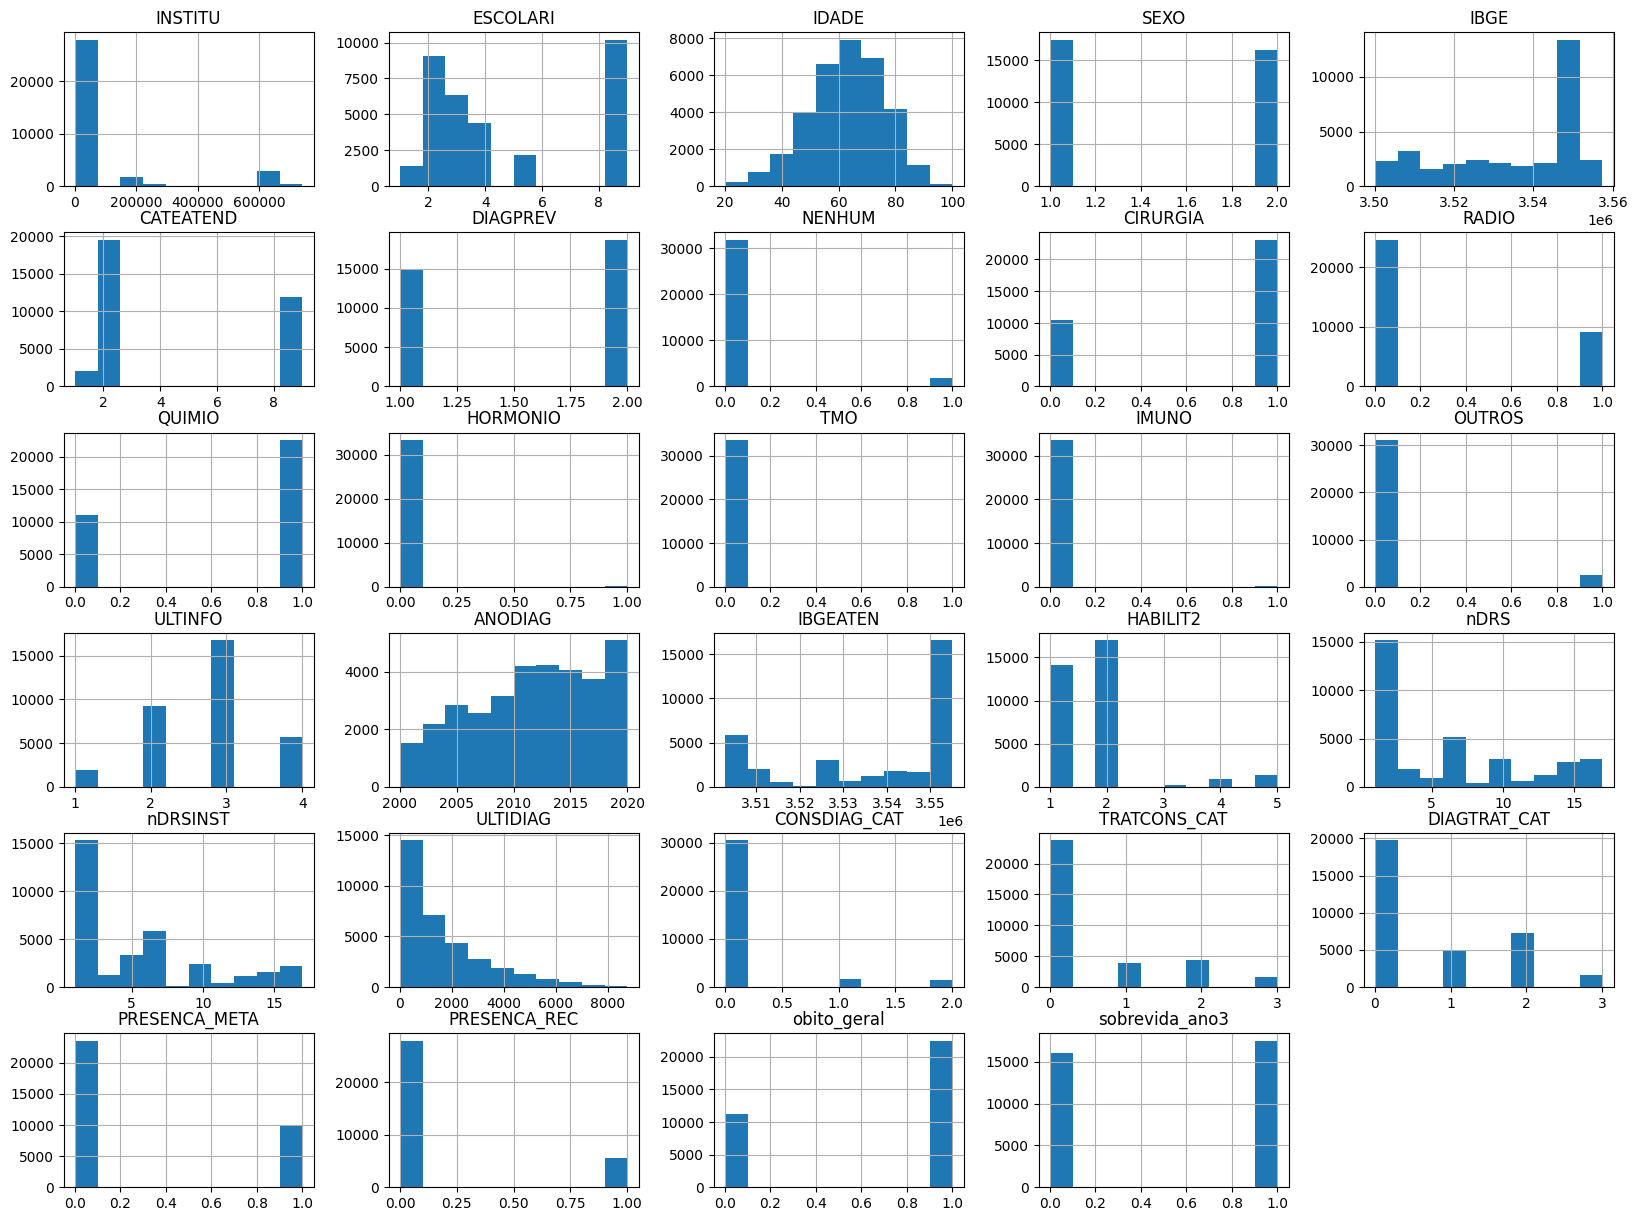

In [84]:
# Histograms using the pandas library
df.hist(  # Creates histograms for all variables
    bins=10,  # Number of bins
    figsize=(20, 15))  # Size of the figures

# Displays the histograms
plt.show()

### <font color=DeepSkyBlue>**Correlation Matrix**

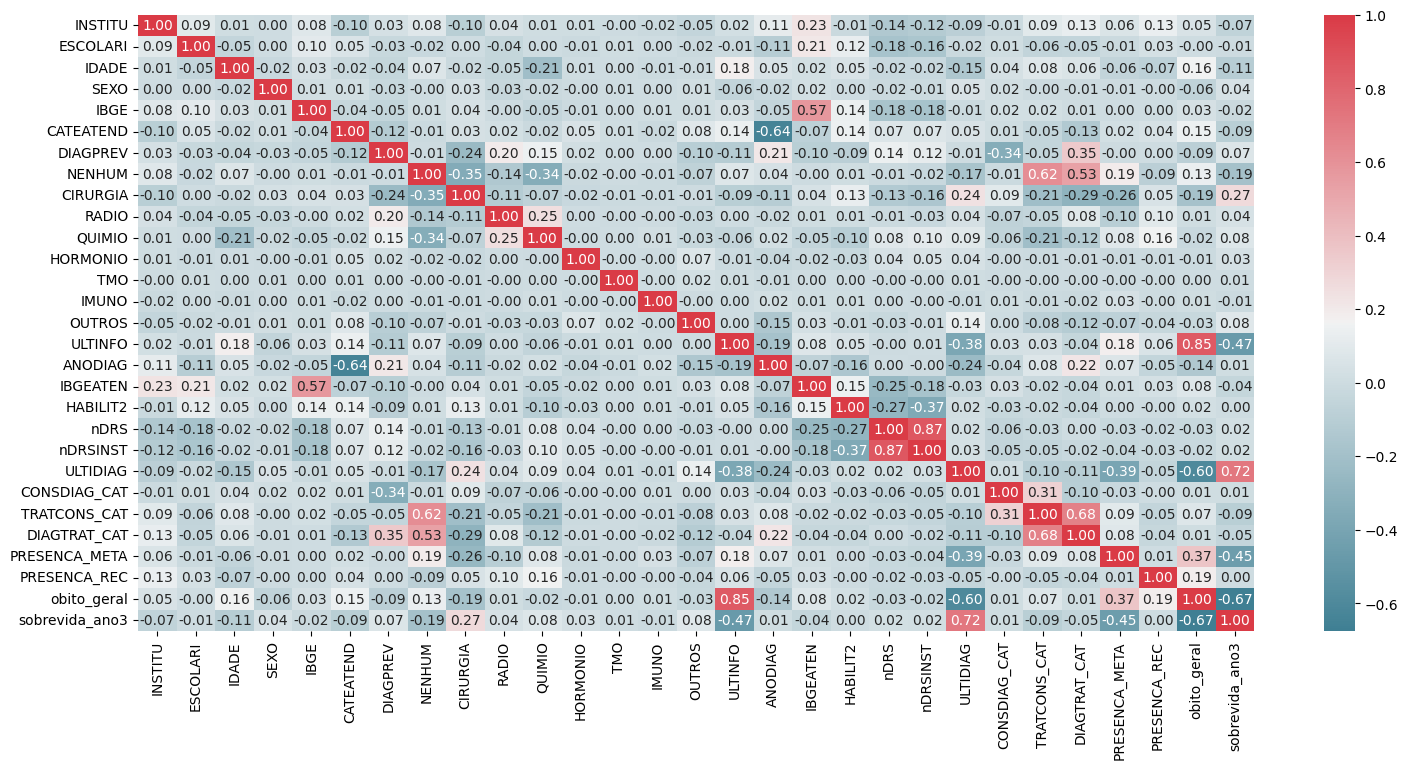

In [85]:
# Calculates the correlation matrix for numerical columns in the DataFrame
## The correlation between two variables ranges from -1 to 1 (Inversely and Directly proportional, respectively)
corr_matrix = df.corr(numeric_only=True)

# Size of the correlation matrix boxes
fig, ax = plt.subplots(figsize=(18, 8))

# Definition of the colormap for the heatmap
colormap = sns.diverging_palette(220, 10, as_cmap=True)

# Creating the heatmap
sns.heatmap(
      corr_matrix,  # Uses the correlation matrix
      cmap=colormap,  # Sets the colors
      annot=True,  # Displays the values
      fmt='.2f'  # Shows values with 2 decimal places
)

# Displays the chart
plt.show()

### <font color=Chartreuse> **Percentage of patients by clinical staging over the years of diagnosis**



<font color=GOLD>**1.**</font> I observed that the clinical staging column had more groups than just EC I, EC II, EC III, and EC IV.

<font color=RED>**Note:**</font> Later, I reviewed the columns and found that the column `ECGRUP` was perfect for viewing the groups without subdivisions.

<font color=GOLD>**2.**</font> Therefore, it was necessary to group the remaining subgroups into the main groups I, II, III, and IV.

<font color=GOLD>**3.**</font> Then, I selected the values and names, as done previously for various charts.

<font color=GOLD>**4.**</font> Finally, with everything prepared, the chart "Percentage of Patients in Each Stage by Year of Diagnosis" was created.

In [86]:
# Visualização de todos os tipos de Estagiamentos Clínicos (EC)
df['EC'].value_counts().sort_index()

,count
EC,
I,3759
II,3265
IIA,4838
IIB,978
IIC,259
III,3611
IIIA,1075
IIIB,3845
IIIC,1936


In [87]:
# Create a copy of the original DataFrame
df_modificado = df.copy()

# Group the subgroups into the main stages using a new DataFrame
df_modificado['EC'] = df_modificado['EC'].replace({
      'IA': 'I', 'IB': 'I', 'IC': 'I',
      'IIA': 'II', 'IIB': 'II', 'IIC': 'II',
      'IIIA': 'III', 'IIIB': 'III', 'IIIC': 'III',
      'IVA': 'IV', 'IVB': 'IV', 'IVC': 'IV',
})

In [88]:
# Division of the total number of patients per year for each clinical staging group based on the number of patients in each staging group for that year
## Create a simulation using only ANODIAG and EC -> df_modificado.groupby(['ANODIAG', 'EC'])
## Number of occurrences in each group -> size()
## Rearrange the EC indices into columns -> unstack(fill_value=0)
## Divide the value of each staging group by the total number of stagings in the year and display as a percentage -> div(df.groupby('ANODIAG').size(), axis=0)
df_percentage = df_modificado.groupby(['ANODIAG', 'ECGRUP']).size().unstack().div(df.groupby('ANODIAG').size(), axis=0)

# Display the table
display(df_percentage)

ECGRUP,I,II,III,IV
ANODIAG,,,,
2000,0.111549,0.314961,0.305774,0.267717
2001,0.137662,0.305195,0.281818,0.275325
2002,0.133010,0.286408,0.319417,0.261165
2003,0.094737,0.321053,0.319298,0.264912
2004,0.122677,0.318959,0.321933,0.236431
2005,0.112292,0.294352,0.314286,0.279070
2006,0.118919,0.279537,0.328185,0.273359
2007,0.133333,0.291270,0.317460,0.257937
2008,0.134538,0.292503,0.291165,0.281794


In [89]:
# List of clinical stages
stages = ['I', 'II', 'III', 'IV']

# Creating the chart/figure
fig = go.Figure()

# Adding bar charts for each stage
for stage in stages:
    fig.add_trace(go.Bar(
        x=df_percentage.index,  # x-axis values (Years of diagnosis)
        y=df_percentage[stage],  # y-axis values (values for each stage)

        name=f'EC {stage}',  # Legend names

        text=(df_percentage[stage] * 100).round(1).astype(str) + '%',  # Add percentage labels to the bars
        textposition='inside'  # Label position
    ))

# Chart layout
fig.update_layout(
    barmode='stack',  # Stacked bar mode

    title_text='<u>Percentage of Patients in Each Stage by Year of Diagnosis<u>',  # Chart title
    title_font=dict(size=24, family='Arial', color='black', weight=True),  # Title formatting
    title_x=0.5,  # Center the title

    xaxis_title='Year of Diagnosis',  # x-axis title
    xaxis_title_font=dict(size=16, family='Arial', color='black', weight=True),  # x-axis text formatting
    xaxis=dict(tickmode='linear'),  # Display all years

    yaxis_title='Patients (%)',  # y-axis title
    yaxis_title_font=dict(size=16, family='Arial', color='black', weight=True),  # y-axis text formatting

    legend=dict(title='Clinical Stages (EC)'),  # Legend title
)

fig.update_traces(marker=dict(line=dict(width=0.5, color='black')))  # Borders on bars for better visualization

# Display the chart
fig.show()

### <font color=#DC143C>**Survival curves according to clinical staging**

In [90]:
# Visualization of the last diagnosis of patients
df['ULTIDIAG'].value_counts().sort_index()

,count
ULTIDIAG,
0,49
1,63
2,80
3,52
4,35
...,...
8636,1
8692,1
8694,1


In [91]:
# Viewing clinical internship groups
df['ECGRUP'].value_counts().sort_index()

,count
ECGRUP,
I,3759
II,9340
III,10467
IV,10057


In [92]:
# Create a copy of the original DataFrame
df_desafio = df.copy()

# Adjust the 'ULTIDIAG' column from days to months, rounding to the nearest value
df_desafio['ULTIDIAG'] = (df_desafio.ULTIDIAG / 30).round()

# # Limit the values to a maximum of 60 months (adjust up to 5 years)
# df_desafio['ULTIDIAG'] = df_desafio['ULTIDIAG'].apply(lambda x: 60 if x > 60 else x)

In [93]:
# List of staging groups and their corresponding colors
stages = ['I', 'II', 'III', 'IV']
colors = ['blue', 'red', 'green', 'purple']

# Create a figure/chart to add survival curves
fig = go.Figure()

# Loop to format the legend with colors
for stage, color in zip(stages, colors):
    # Filter data by staging group
    stage_data = df_desafio[df_desafio['ECGRUP'] == stage]

    # Group data by time in months ('ULTIDIAG'), count total records, and sum events (deaths)
    survival_data = stage_data.groupby('ULTIDIAG')['obito_geral'].agg(
        total='count',
        events='sum').sort_index()

    # Calculate cumulative events (deaths) over time
    survival_data['cumulative_events'] = survival_data['events'].cumsum()

    # Calculate the cumulative survival rate for each month
    survival_data['survival_rate'] = (1 - survival_data['cumulative_events'] / survival_data['total'].sum())

    # Add the survival curve to the chart
    fig.add_trace(go.Scatter(
        x=survival_data.index,
        y=survival_data['survival_rate'],
        mode='lines+markers+text',
        name=f'ECGRUP = {stage}',
        line=dict(color=color),
        marker=dict(size=6),
    ))

# Chart layout
fig.update_layout(
    title='<u>Survival Curves of Patients by Clinical Staging and Months After Diagnosis<u>',
    title_font=dict(size=24, family='Arial', color='black', weight=True),
    title_x=0.5,

    xaxis_title='Months After Diagnosis',
    xaxis_title_font=dict(size=16, family='Arial', color='black', weight=True),
    xaxis=dict(range=[0, 60], gridcolor='lightgrey'),

    yaxis_title='Survival Rate (%)',
    yaxis_title_font=dict(size=16, family='Arial', color='black', weight=True),
    yaxis=dict(gridcolor='lightgrey'),

    legend=dict(title='Clinical Stages'),
)

# Display the chart
fig.show()

## <font color=#FFB90F> **Training and Testing**

### <font color=	#20B2AA> **Division into training and testing**

In [94]:
# Visualizing columns in DataFrame
df.columns

Index(['INSTITU', 'ESCOLARI', 'IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV',
       'TOPO', 'EC', 'ECGRUP', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO',
       'HORMONIO', 'TMO', 'IMUNO', 'OUTROS', 'ULTINFO', 'ANODIAG', 'IBGEATEN',
       'HABILIT2', 'nDRS', 'nDRSINST', 'ULTIDIAG', 'CONSDIAG_CAT',
       'TRATCONS_CAT', 'DIAGTRAT_CAT', 'PRESENCA_META', 'PRESENCA_REC',
       'obito_geral', 'sobrevida_ano3'],
      dtype='object')

In [95]:
# Create the variable X by removing columns that will not be used as predictors (already used or without value) / can be predicted columns
## sobrevida_ano3 - The column representing 3-year survival, which will be the target variable (y)
X = df.drop(['ECGRUP', 'ULTINFO', 'ULTIDIAG', 'obito_geral', 'sobrevida_ano3'], axis=1)

# Create the variable y, which represents the target column, 'sobrevida_ano3', indicating whether the patient survived for 3 years
y = df['sobrevida_ano3']

# Display the input and output columns (respectively)
display(X)
display(y)

,INSTITU,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,EC,NENHUM,...,ANODIAG,IBGEATEN,HABILIT2,nDRS,nDRSINST,CONSDIAG_CAT,TRATCONS_CAT,DIAGTRAT_CAT,PRESENCA_META,PRESENCA_REC
0,16772,9,94,2,3550308,9,1,C181,II,0,...,2001,3550308,4,1,1,0,0,0,0,0
1,19976,9,95,2,3556701,2,2,C181,IIIC,0,...,2015,3509502,1,7,7,0,2,2,0,0
2,16675,9,88,2,3550308,2,1,C181,IIB,0,...,2012,3550308,2,1,1,0,0,0,0,0
3,14,4,87,2,3550308,1,1,C181,IIB,0,...,2014,3550308,5,1,1,0,0,0,0,0
4,208066,9,73,1,3500105,9,2,C181,IV,0,...,2003,3555000,1,9,9,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33618,16675,9,24,2,3550308,2,1,C209,IVB,0,...,2018,3550308,2,1,1,0,1,1,1,0
33619,612374,9,24,1,3521002,2,1,C209,IVB,0,...,2019,3550308,2,16,1,0,0,0,1,1
33620,8672,4,20,2,3516309,2,1,C209,IVA,0,...,2015,3550308,2,1,1,0,1,0,1,0
33621,275513,4,24,2,3532207,2,2,C209,III,0,...,2020,3541406,1,11,11,0,0,1,0,0


,sobrevida_ano3
0,0
1,1
2,0
3,1
4,1
...,...
33618,0
33619,0
33620,0
33621,0


In [96]:
# Import the train_test_split function from scikit-learn to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
## test_size=0.25 indicates that 25% of the data will be used for testing and 75% for training
## random_state=19 ensures reproducibility by making the split the same on each run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)

# Display the dimensions of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25217, 27), (8406, 27), (25217,), (8406,))

In [97]:
X_train

,INSTITU,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,EC,NENHUM,...,ANODIAG,IBGEATEN,HABILIT2,nDRS,nDRSINST,CONSDIAG_CAT,TRATCONS_CAT,DIAGTRAT_CAT,PRESENCA_META,PRESENCA_REC
3240,21636,5,63,2,3543501,2,1,C182,IIIB,0,...,2015,3525300,2,16,6,1,0,0,0,0
8640,208259,2,60,1,3548807,9,1,C187,IV,0,...,2011,3548807,1,1,1,0,0,0,1,1
15293,17000,3,40,1,3550308,2,1,C189,II,0,...,2004,3550308,2,1,1,0,0,0,0,0
16616,16659,9,55,1,3550308,9,1,C184,IV,0,...,2006,3550308,5,1,1,0,0,0,1,0
3727,8672,4,57,1,3550308,2,1,C182,IVA,0,...,2016,3550308,2,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17218,21636,2,78,2,3525300,9,1,C199,II,0,...,2002,3525300,2,6,6,0,0,0,0,0
17738,21636,2,70,1,3500709,2,2,C199,IIA,0,...,2014,3525300,2,6,6,0,0,0,0,0
21416,21318,9,77,1,3548906,9,1,C209,IIIB,0,...,2011,3548906,1,3,3,1,0,0,0,0
17141,21130,4,41,2,3513108,2,2,C184,IIIA,0,...,2018,3543402,2,13,13,0,2,2,0,0


#### <font color=#A9A9A9> **Comparations**

In [98]:
df.IDADE.mean()

62.34651875204473

In [99]:
X_train.IDADE.mean()

62.34258635047785

In [100]:
X_test.IDADE.mean()

62.358315488936476

### <font color=#20B2AA> **OrdinalEncoder**

In [101]:
# Displaying training bank columns that are of type object (Categorical)
X_train.select_dtypes(include='object').columns

Index(['TOPO', 'EC'], dtype='object')

In [102]:
# Displays the unique values ​​of the 'TOP' column in ascending order
## Allows you to understand the values ​​present in 'TOP' and decide how you need to encode them
np.sort(X_train['TOPO'].unique())

array(['C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C186', 'C187',
       'C188', 'C189', 'C199', 'C209'], dtype=object)

In [103]:
# Displays the unique values ​​of the 'EC' column in ascending order
## Allows you to understand the values ​​present in 'EC' and decide how you will need to encode them
np.sort(X_train['EC'].unique())

array(['I', 'II', 'IIA', 'IIB', 'IIC', 'III', 'IIIA', 'IIIB', 'IIIC',
       'IV', 'IVA', 'IVB', 'IVC'], dtype=object)

In [104]:
# Import the OrdinalEncoder function from the scikit-learn library
## OrdinalEncoder is used to transform categorical variables into numeric values in an ORDERED manner
from sklearn.preprocessing import OrdinalEncoder

# OrdinalEncoder configuration
oe = OrdinalEncoder(
            handle_unknown='use_encoded_value',  # Specifies how to handle unknown values; 'use_encoded_value' allows defining a specific value
            unknown_value=-1  # Sets unknown values to be encoded as -1
)

# Fit the encoder to the 'EC' column in X_train
## The fit method trains the encoder on the training data, learning the ordinal encoding for each category
oe.fit(X_train[['EC']])

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [105]:
# Transform the 'EC' column in X_train using the OrdinalEncoder
# The transform method converts the categories in the 'EC' column into ordered numeric values
X_train[['EC']] = oe.transform(X_train[['EC']])

In [106]:
# Viewing the encoded EC column
X_train[['EC']].value_counts().sort_index()

,count
EC,
0.0,2823
1.0,2482
2.0,3587
3.0,705
4.0,184
5.0,2759
6.0,783
7.0,2876
8.0,1424


In [107]:
# inverse_transform - decode a numeric value back to the original category
## EXAMPLE: transforms the encoded value 1 back to the corresponding category
oe.inverse_transform([[1]])

array([['II']], dtype=object)

In [108]:
# Check X_train columns of type 'object' to see if other categorical columns are unencoded or if they are all encoded correctly
X_train.select_dtypes(include='object').columns

Index(['TOPO'], dtype='object')

### <font color=#20B2AA> **One Hot Encoder**

In [109]:
# Import the OneHotEncoder from the scikit-learn library
## OneHotEncoder is used to convert categorical variables into binary variables (0 and 1) for each category by CREATING NEW COLUMNS
from sklearn.preprocessing import OneHotEncoder

# Copy X_train to apply OneHotEncoder without modifying the original
X_train_ohe = X_train.copy()

# OneHotEncoder configuration
ohe = OneHotEncoder(
            handle_unknown='ignore',  # Ignores unknown categories in the test data
            drop='first'  # Removes the first category of each variable to avoid multicollinearity
)

# Fit the encoder to the 'TOPO' column in X_train_ohe, learning the categories of this variable
ohe.fit(X_train_ohe[['TOPO']])

OneHotEncoder(drop='first', handle_unknown='ignore')

In [110]:
# Each category in 'TOPO' is transformed into a column with 0 or 1, indicating the presence of that category
ohe_results = ohe.transform(X_train_ohe[['TOPO']]).toarray()
ohe_results[:4]  # Displays the first 4 rows of the encoded data

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [111]:
# Create an auxiliary DataFrame
df_aux = pd.DataFrame(
              ohe_results,  # Results from the OneHotEncoder
              index=X_train_ohe.index,  # Set the index to match X_train_ohe (maintaining row correspondence)
              columns=ohe.get_feature_names_out()  # Set column names as the encoded categories from the encoder
)
df_aux.head(3)

,TOPO_C181,TOPO_C182,TOPO_C183,TOPO_C184,TOPO_C185,TOPO_C186,TOPO_C187,TOPO_C188,TOPO_C189,TOPO_C199,TOPO_C209
3240,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8640,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [112]:
# Display from X_train_ohe before joining with the auxiliary DataFrame
X_train_ohe.head(3)

,INSTITU,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,EC,NENHUM,...,ANODIAG,IBGEATEN,HABILIT2,nDRS,nDRSINST,CONSDIAG_CAT,TRATCONS_CAT,DIAGTRAT_CAT,PRESENCA_META,PRESENCA_REC
3240,21636,5,63,2,3543501,2,1,C182,7.0,0,...,2015,3525300,2,16,6,1,0,0,0,0
8640,208259,2,60,1,3548807,9,1,C187,9.0,0,...,2011,3548807,1,1,1,0,0,0,1,1
15293,17000,3,40,1,3550308,2,1,C189,1.0,0,...,2004,3550308,2,1,1,0,0,0,0,0


In [113]:
# Perform a merge of the X_train_ohe DataFrame with the auxiliary DataFrame df_aux
## 'how="left"' ensures that all data from X_train_ohe will be retained
## 'left_index=True' and 'right_index=True' specify that the merge should be based on the indices
X_train_ohe = X_train_ohe.merge(df_aux, how='left', left_index=True, right_index=True)

In [114]:
# Display the first 3 lines of X_train_ohe after joining with df_aux
X_train_ohe.head(3)

,INSTITU,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,EC,NENHUM,...,TOPO_C182,TOPO_C183,TOPO_C184,TOPO_C185,TOPO_C186,TOPO_C187,TOPO_C188,TOPO_C189,TOPO_C199,TOPO_C209
3240,21636,5,63,2,3543501,2,1,C182,7.0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8640,208259,2,60,1,3548807,9,1,C187,9.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15293,17000,3,40,1,3550308,2,1,C189,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [115]:
# Display the original 'TOPO' column in X_train_ohe to confirm it is still present
X_train_ohe['TOPO'].head(3)

,TOPO
3240,C182
8640,C187
15293,C189


In [116]:
# Remove the original 'TOPO' column from X_train_ohe as it is now represented by binary columns
X_train_ohe.drop(columns=['TOPO'], inplace=True)

# Display the column names to confirm that the 'TOP' column has been removed and the new columns have been added
X_train_ohe.columns

Index(['INSTITU', 'ESCOLARI', 'IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV',
       'EC', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO', 'TMO',
       'IMUNO', 'OUTROS', 'ANODIAG', 'IBGEATEN', 'HABILIT2', 'nDRS',
       'nDRSINST', 'CONSDIAG_CAT', 'TRATCONS_CAT', 'DIAGTRAT_CAT',
       'PRESENCA_META', 'PRESENCA_REC', 'TOPO_C181', 'TOPO_C182', 'TOPO_C183',
       'TOPO_C184', 'TOPO_C185', 'TOPO_C186', 'TOPO_C187', 'TOPO_C188',
       'TOPO_C189', 'TOPO_C199', 'TOPO_C209'],
      dtype='object')

In [117]:
# Check if there are still columns of type 'object' in X_train_ohe to ensure that all categorical variables have been encoded
X_train_ohe.select_dtypes(include='object').columns

Index([], dtype='object')

### <font color=#20B2AA>**Normalization**

In [118]:
# Import the MinMaxScaler from the scikit-learn library
# MinMaxScaler is used to normalize data, scaling each feature to a specified range, by default between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# Variable to configure the MinMaxScaler
## MinMaxScaler will transform each column in X_train_ohe so that values fall within the range of 0 to 1
mms = MinMaxScaler()

# Fit the MinMaxScaler to the training data X_train_ohe
# The fit method calculates the minimum and maximum values for each column in X_train_ohe, which will be used for normalization
mms.fit(X_train_ohe)

MinMaxScaler()

In [119]:
# Transform X_train_ohe using the minimum and maximum values calculated during fitting
## The transform method applies normalization to each column in X_train_ohe based on the calculated minimum and maximum values
X_train_norm = mms.transform(X_train_ohe)

# Display the normalized data from X_train_ohe
X_train_norm

array([[0.02923027, 0.5       , 0.5375    , ..., 0.        , 0.        ,
        0.        ],
       [0.28139318, 0.125     , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.02296616, 0.25      , 0.25      , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.02880059, 1.        , 0.7125    , ..., 0.        , 0.        ,
        1.        ],
       [0.02854657, 0.375     , 0.2625    , ..., 0.        , 0.        ,
        0.        ],
       [0.02245811, 0.125     , 0.9125    , ..., 1.        , 0.        ,
        0.        ]])

In [120]:
# Check the minimum and maximum values ​​of the normalized data to confirm that normalization was applied correctly
X_train_norm.min()
X_train_norm.max()

1.0000000000000002

In [121]:
# Display the X_test (untransformed) dataset
X_test

,INSTITU,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,EC,NENHUM,...,ANODIAG,IBGEATEN,HABILIT2,nDRS,nDRSINST,CONSDIAG_CAT,TRATCONS_CAT,DIAGTRAT_CAT,PRESENCA_META,PRESENCA_REC
31700,18597,3,41,1,3513504,9,2,C209,IIIB,0,...,2006,3548500,1,4,4,0,0,2,0,0
9234,16772,3,48,1,3547304,9,1,C187,IV,0,...,2004,3550308,4,1,1,2,2,0,1,1
28550,16624,4,57,1,3550308,2,1,C209,IV,0,...,2011,3550308,2,1,1,0,0,0,1,0
18425,20435,2,60,1,3538709,2,1,C199,IIIB,0,...,2016,3538709,1,10,10,0,0,0,0,0
6029,16659,9,87,2,3550308,1,1,C187,IV,0,...,2013,3550308,5,1,1,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14097,20621,3,61,1,3503208,2,2,C189,IIIC,0,...,2013,3503208,1,3,3,0,0,0,0,1
28640,20400,3,62,1,3538709,1,2,C209,IVA,0,...,2017,3538709,1,10,10,0,0,0,1,0
23384,17000,3,65,1,3513801,2,1,C209,IIIA,0,...,2006,3550308,2,1,1,0,0,0,0,0
16971,21636,4,53,2,3519600,1,1,C184,IVA,1,...,2016,3525300,2,3,6,0,3,3,1,0


### <font color=#20B2AA> **Test Data Transformation**

In [122]:
# Create a copy of X_test to apply transformations without modifying the original
X_test_enc = X_test.copy()

# Apply Ordinal Encoder to the 'EC' column in X_test_enc
## Transforms categorical values into numeric values using the same encoding as in the training data
X_test_enc[['EC']] = oe.transform(X_test_enc[['EC']])

# Apply One Hot Encoder to the 'TOPO' column in X_test_enc and convert to an array
## Transforms the categories in 'TOPO' into binary columns (0 and 1) for each category, as done in the training data
ohe_results = ohe.transform(X_test_enc[['TOPO']]).toarray()

# Create an auxiliary DataFrame
df_aux = pd.DataFrame(
              ohe_results,  # Results from the One Hot Encoder
              index=X_test_enc.index,  # Set the index to match X_test_enc (maintain row correspondence)
              columns=ohe.get_feature_names_out()  # Set column names as the encoded categories from the encoder
)

# Merge the X_test_enc DataFrame with the auxiliary df_aux DataFrame, adding the new encoded columns
## 'how="left"' keeps all data from X_test_enc, and 'left_index=True' and 'right_index=True' ensure the merge is based on indices
X_test_enc = X_test_enc.merge(
              df_aux,  # Use the auxiliary DataFrame with One Hot Encoded data
              how='left',  # Append to the end
              left_index=True, right_index=True  # Merge based on indices
)

# Drop the original 'TOPO' column from X_test_enc, now represented by the binary columns
X_test_enc.drop(columns=['TOPO'], inplace=True)

# Normalize the test data using the MinMaxScaler fitted on the training data
X_test_norm = mms.transform(X_test_enc)

In [123]:
# Display the normalized data from X_test
X_test_norm

array([[0.02512401, 0.25      , 0.2625    , ..., 0.        , 0.        ,
        1.        ],
       [0.02265809, 0.25      , 0.35      , ..., 0.        , 0.        ,
        0.        ],
       [0.02245811, 0.375     , 0.4625    , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.02296616, 0.25      , 0.5625    , ..., 0.        , 0.        ,
        1.        ],
       [0.02923027, 0.375     , 0.4125    , ..., 0.        , 0.        ,
        0.        ],
       [0.02252702, 0.        , 0.7       , ..., 0.        , 0.        ,
        0.        ]])

In [124]:
# Check the dimensions of the training and testing sets to ensure they are consistent
X_test_norm.shape, X_train_norm.shape

((8406, 37), (25217, 37))

## <font color=#DC143C> **Training and Testing (Functions)**

### <font color=#7B68EE>**Division into Training and Testing**

In [125]:
from sklearn.model_selection import train_test_split

def train_test(df, drop_cols, label, test_size=0.25, random_state=19):
    """
    Description:
      Splits the DataFrame into training and testing datasets based on a target variable and a list of columns to exclude.

    Parameters:
      df: DataFrame
        The DataFrame to be split into training and testing sets.
      drop_cols: list
        List of columns to be excluded from the DataFrame.
      label: str
        The name of the column representing the target variable.
      test_size: float, optional
        The fraction of the data to be used as the test set.
      random_state: int, optional
        Seed for random number generation to ensure reproducibility.

    Returns:
      X_train : DataFrame
        Training DataFrame containing predictor variables.
      X_test : DataFrame
        Testing DataFrame containing predictor variables.
      y_train : DataFrame
        Training DataFrame containing the target variable.
      y_test : DataFrame
        Testing DataFrame containing the target variable.

    """
    # Create a copy of the original DataFrame
    df_aux = df.copy()

    # Drop unwanted columns
    col = df_aux.columns.drop(drop_cols)

    # Remove the target column from predictor variables
    col = col.drop(label)

    # Select predictor columns in the auxiliary DataFrame
    X = df_aux[col]

    # Define the target variable based on the specified column
    y = df_aux[label].copy()

    # Split the data into training and testing sets using train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X,  # Predictor variables
        y,  # Target variable
        test_size=test_size,  # Proportion of data for testing
        random_state=random_state,  # Ensures reproducible splits
        stratify=y  # Ensures the target distribution is preserved in both sets
    )

    return X_train, X_test, y_train, y_test

In [126]:
# Defining columns to exclude and the target column
drop_cols = ['ECGRUP', 'ULTINFO', 'ULTIDIAG', 'obito_geral']
target_col = 'sobrevida_ano3'

# Using the function to split the DataFrame
X_train1, X_test1, y_train1, y_test1 = train_test(df, drop_cols, target_col, test_size=0.25, random_state=19)

# Display the dimensions of the training and testing sets
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape

((25217, 27), (8406, 27), (25217,), (8406,))

In [127]:
# Comparison of the AGE column average to check consistency
df.IDADE.mean(), X_train1.IDADE.mean(), X_test1.IDADE.mean()

(62.34651875204473, 62.282269897291506, 62.53925767309065)

In [128]:
X_train1

,INSTITU,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,EC,NENHUM,...,ANODIAG,IBGEATEN,HABILIT2,nDRS,nDRSINST,CONSDIAG_CAT,TRATCONS_CAT,DIAGTRAT_CAT,PRESENCA_META,PRESENCA_REC
15214,20737,4,48,2,3523404,9,1,C189,IV,1,...,2011,3505500,2,7,5,0,3,3,1,0
25564,16624,3,66,1,3518800,2,1,C209,IV,1,...,2013,3550308,2,1,1,0,3,3,1,0
18262,20435,4,64,2,3538709,1,1,C199,II,0,...,2017,3538709,1,10,10,0,0,0,0,0
20614,19976,9,75,2,3510401,9,2,C209,IIA,0,...,2007,3509502,1,10,7,0,0,2,0,0
16623,20737,4,58,1,3537305,9,2,C184,IV,0,...,2009,3505500,2,2,5,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9026,38628,9,53,2,3502804,9,1,C187,IIB,0,...,2008,3502804,1,2,2,2,2,0,0,1
16261,15,2,68,1,3530805,2,2,C184,IV,0,...,2008,3530706,1,14,14,0,0,0,1,0
25420,38628,2,70,2,3556305,2,1,C209,IIIB,0,...,2017,3502804,1,2,2,0,0,0,0,0
13900,612374,4,62,1,3515103,2,2,C189,IV,1,...,2013,3550308,2,1,1,0,3,3,1,0


In [129]:
X_train1.shape

(25217, 27)

In [130]:
X_train1.columns

Index(['INSTITU', 'ESCOLARI', 'IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV',
       'TOPO', 'EC', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO',
       'TMO', 'IMUNO', 'OUTROS', 'ANODIAG', 'IBGEATEN', 'HABILIT2', 'nDRS',
       'nDRSINST', 'CONSDIAG_CAT', 'TRATCONS_CAT', 'DIAGTRAT_CAT',
       'PRESENCA_META', 'PRESENCA_REC'],
      dtype='object')

### <font color=#7B68EE>**Training Pre-Processing**

<font color=#EEDD82>**OBS:**</font> Study new encoders

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


def train_preprocessing(df, ohe_encoder=None, normalizer='StandardScaler'):
    """
    Description:
      Preprocesses the training dataset by applying categorical variable encoding
      and normalization for numerical variables.

    Parameters:
      df : pandas.DataFrame
        The dataset to be preprocessed.
      ohe_encoder : list, optional
        List of column names to apply One Hot Encoding.
        Categorical columns not selected will be encoded with Label Encoding.
      normalizer : str, optional
        Type of normalization to be used for scaling the variables:
          - 'StandardScaler': Normalizes with mean 0 and standard deviation 1.
          - 'MinMaxScaler': Scales values between 0 and 1.
          - 'MaxAbsScaler': Scales values between -1 and 1 based on absolute value.
          - 'QuantileTransformer': Transforms variables to follow a normal distribution.

    Returns:
      df_aux : pandas.DataFrame
        Preprocessed dataset.
      enc : dict
        Dictionary of encoders, where each categorical variable has a corresponding encoder.
      norm : object
        Data normalizer used for scaling numerical variables.
      feat_cols : list
        List of column names in the resulting DataFrame after preprocessing.

    Raises:
      ValueError:
        - If `ohe_encoder` contains columns not present in the original DataFrame.
        - If the specified normalizer type is not among the supported options.
    """

    # Copy the original DataFrame
    df_aux = df.copy()

    # Dictionary to store encoders for categorical variables
    enc = dict()

    # Check columns in ohe_encoder and apply One Hot Encoding
    if ohe_encoder:
        # Verify that all columns in ohe_encoder are present in the DataFrame
        missing_cols = [col for col in ohe_encoder if col not in df_aux.columns]
        if missing_cols:
            raise ValueError(f"Columns not found in the DataFrame: {missing_cols}")

        for col in ohe_encoder:
            # Apply One Hot Encoding to the specified column
            enc[col] = OneHotEncoder(handle_unknown='ignore', drop='first')
            ohe_results = enc[col].fit_transform(df_aux[[col]])

            # Convert the result into a DataFrame and concatenate with the original DataFrame
            df1 = pd.DataFrame(ohe_results.toarray(),
                               columns=enc[col].get_feature_names_out(),
                               index=df_aux.index)
            df_aux = pd.concat([df_aux, df1], axis=1)

        # Drop original columns in ohe_encoder to avoid duplication
        df_aux.drop(columns=ohe_encoder, inplace=True)

    # Apply Ordinal Encoding to remaining categorical columns
    list_categorical = df_aux.select_dtypes(include='object').columns
    if len(list_categorical) > 0:
        enc['ordinal'] = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        df_aux[list_categorical] = enc['ordinal'].fit_transform(df_aux[list_categorical])

    # Store column names after encoding
    feat_cols = df_aux.columns

    # Define the normalizer based on the input parameter
    normalizers = {
        'StandardScaler': StandardScaler(),
        'MinMaxScaler': MinMaxScaler((0, 1)),
        'MaxAbsScaler': MaxAbsScaler(),
        'QuantileTransformer': QuantileTransformer(output_distribution='normal')
    }

    # Verify that the specified normalizer is among the supported options
    if normalizer not in normalizers:
        raise ValueError(f"Normalizer '{normalizer}' is not supported. Choose from {list(normalizers.keys())}.")

    # Apply normalization to numerical variables
    norm = normalizers[normalizer]
    df_aux = norm.fit_transform(df_aux)

    return df_aux, enc, norm, feat_cols

In [132]:
# Example of application
# Assuming 'TOPO' is a column for One Hot Encoding, and we want to use 'StandardScaler' for normalization
X_train1, encoders, normalizer_used, columns = train_preprocessing(
    X_train1,
    ohe_encoder=['TOPO'],
    normalizer='StandardScaler'
)

In [133]:
# Convert the preprocessed data back to a pandas DataFrame with the original column names
X_train1 = pd.DataFrame(X_train1, columns=columns)

# Display the first few rows of the preprocessed DataFrame
display(X_train1.head())

# Display the shape of X_train1
X_train1.shape

,INSTITU,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,EC,NENHUM,CIRURGIA,...,TOPO_C182,TOPO_C183,TOPO_C184,TOPO_C185,TOPO_C186,TOPO_C187,TOPO_C188,TOPO_C189,TOPO_C199,TOPO_C209
0,-0.383934,-0.242244,-1.104215,1.038781,-0.697439,1.346907,-1.113159,0.997714,4.236261,-1.485613,...,-0.292305,-0.092732,-0.193378,-0.087821,-0.214277,-0.41658,-0.07813,2.342190,-0.247271,-0.864324
1,-0.406088,-0.580281,0.287431,-0.962666,-0.963754,-0.711361,-1.113159,0.997714,4.236261,-1.485613,...,-0.292305,-0.092732,-0.193378,-0.087821,-0.214277,-0.41658,-0.07813,-0.426951,-0.247271,1.156974
2,-0.385561,-0.242244,0.132804,1.038781,0.187867,-1.005399,-1.113159,-1.196065,-0.236057,0.673123,...,-0.292305,-0.092732,-0.193378,-0.087821,-0.214277,-0.41658,-0.07813,-0.426951,4.044147,-0.864324
3,-0.388033,1.447941,0.983254,1.038781,-1.449588,1.346907,0.898344,-0.921843,-0.236057,-1.485613,...,-0.292305,-0.092732,-0.193378,-0.087821,-0.214277,-0.41658,-0.07813,-0.426951,-0.247271,1.156974
4,-0.383934,-0.242244,-0.331078,-0.962666,0.106653,1.346907,0.898344,0.997714,-0.236057,0.673123,...,-0.292305,-0.092732,5.171216,-0.087821,-0.214277,-0.41658,-0.07813,-0.426951,-0.247271,-0.864324


(25217, 37)

In [134]:
# X training columns
X_train1.columns

Index(['INSTITU', 'ESCOLARI', 'IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV',
       'EC', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO', 'TMO',
       'IMUNO', 'OUTROS', 'ANODIAG', 'IBGEATEN', 'HABILIT2', 'nDRS',
       'nDRSINST', 'CONSDIAG_CAT', 'TRATCONS_CAT', 'DIAGTRAT_CAT',
       'PRESENCA_META', 'PRESENCA_REC', 'TOPO_C181', 'TOPO_C182', 'TOPO_C183',
       'TOPO_C184', 'TOPO_C185', 'TOPO_C186', 'TOPO_C187', 'TOPO_C188',
       'TOPO_C189', 'TOPO_C199', 'TOPO_C209'],
      dtype='object')

In [135]:
# Visualization of the encoded training X column
X_train1['EC'].value_counts().sort_index()

,count
EC,
-1.470288,2811
-1.196065,2483
-0.921843,3658
-0.647620,744
-0.373398,193
-0.099175,2734
0.175047,776
0.449269,2861
0.723492,1432


### <font color=#7B68EE> **Test Pre-Processing**</font>

In [136]:
def test_preprocessing(df, encoders, norm, ohe_encoder=None):
    """
    Description:
      Preprocesses the test dataset.

    Parameters:
      df : pandas DataFrame
        The dataset to be preprocessed.
      encoders : dict
        Dictionary containing encoder objects used for training data preprocessing.
        The key should be the column name, and the value should be the encoder object for that column.
      norm : object
        Normalization object used for training data preprocessing.
      ohe_encoder : list, default None
        List of columns to be encoded using OneHotEncoder.
        If None, all remaining categorical columns are encoded using OrdinalEncoder.

    Returns:
      df_aux : pandas DataFrame
        The preprocessed dataset.
    """

    # Create a copy of the original DataFrame
    df_aux = df.copy()

    # Apply One Hot Encoding for specified columns using training encoders
    if ohe_encoder:
        # Check if there are columns for One Hot Encoding
        for col in ohe_encoder:
            # Ensure the column has a corresponding encoder in the 'encoders' dictionary
            if col in encoders:
                # Transform the specified column using the training encoder
                ohe_results = encoders[col].transform(df_aux[[col]])
                # Create a DataFrame for the One Hot Encoding results
                df_ohe = pd.DataFrame(
                    ohe_results.toarray(),
                    columns=encoders[col].get_feature_names_out(),
                    index=df_aux.index
                )
                # Concatenate the encoded DataFrame to the test DataFrame
                df_aux = pd.concat([df_aux, df_ohe], axis=1)
                # Drop the original column, now replaced by the encoded features
                df_aux.drop(columns=col, inplace=True)

    # Apply Ordinal Encoding for other categorical columns
    list_categorical = df_aux.select_dtypes(include='object').columns
    # Check if the encoders dictionary includes an ordinal encoder
    if 'ordinal' in encoders:
        # Transform the remaining categorical columns using the ordinal encoder
        df_aux[list_categorical] = encoders['ordinal'].transform(df_aux[list_categorical])

    # Normalize numerical variables using the trained normalizer
    df_aux = pd.DataFrame(
        norm.transform(df_aux),
        columns=df_aux.columns,
        index=df_aux.index
    )

    return df_aux

In [137]:
# Saving Training Database Information
X_test1 = test_preprocessing(X_test1, encoders, normalizer_used, ohe_encoder=['TOPO'])

In [138]:
# Convert the preprocessed data back to a pandas DataFrame with the original column names
X_test1 = pd.DataFrame(X_test1, columns=columns)

# Display the first few rows of the preprocessed DataFrame
display(X_test1.head())

# Display the shape of X_test1
X_test1.shape

,INSTITU,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,EC,NENHUM,CIRURGIA,...,TOPO_C182,TOPO_C183,TOPO_C184,TOPO_C185,TOPO_C186,TOPO_C187,TOPO_C188,TOPO_C189,TOPO_C199,TOPO_C209
1111,-0.390662,1.447941,0.287431,-0.962666,0.968533,-0.711361,-1.113159,0.175047,-0.236057,0.673123,...,-0.292305,-0.092732,-0.193378,11.386748,-0.214277,-0.41658,-0.07813,-0.426951,-0.247271,-0.864324
32445,-0.407235,-0.918318,-0.794960,1.038781,0.858802,-0.711361,0.898344,0.449269,-0.236057,-1.485613,...,-0.292305,-0.092732,-0.193378,-0.087821,-0.214277,-0.41658,-0.07813,-0.426951,-0.247271,1.156974
17851,-0.405813,-0.242244,0.364745,-0.962666,0.858802,-1.005399,0.898344,0.449269,-0.236057,0.673123,...,-0.292305,-0.092732,-0.193378,-0.087821,-0.214277,-0.41658,-0.07813,-0.426951,4.044147,-0.864324
12713,-0.403481,-0.242244,1.060568,1.038781,0.858802,-0.711361,0.898344,-1.196065,-0.236057,-1.485613,...,-0.292305,-0.092732,-0.193378,-0.087821,-0.214277,-0.41658,-0.07813,2.342190,-0.247271,-0.864324
22114,2.802741,1.447941,1.215195,-0.962666,-0.061326,-0.711361,0.898344,-0.921843,4.236261,-1.485613,...,-0.292305,-0.092732,-0.193378,-0.087821,-0.214277,-0.41658,-0.07813,-0.426951,-0.247271,1.156974


(8406, 37)

In [139]:
# Test Bench Columns
X_test1.columns

Index(['INSTITU', 'ESCOLARI', 'IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV',
       'EC', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO', 'TMO',
       'IMUNO', 'OUTROS', 'ANODIAG', 'IBGEATEN', 'HABILIT2', 'nDRS',
       'nDRSINST', 'CONSDIAG_CAT', 'TRATCONS_CAT', 'DIAGTRAT_CAT',
       'PRESENCA_META', 'PRESENCA_REC', 'TOPO_C181', 'TOPO_C182', 'TOPO_C183',
       'TOPO_C184', 'TOPO_C185', 'TOPO_C186', 'TOPO_C187', 'TOPO_C188',
       'TOPO_C189', 'TOPO_C199', 'TOPO_C209'],
      dtype='object')

### <font color=#7B68EE>**Processing** </font>

In [140]:
from imblearn.over_sampling import SMOTE

def preprocessing(df, cols_drop, label, test_size=0.25, ohe_encoder=None, norm_name='StandardScaler', return_enc_norm=False, balance_data=False, random_state=0, verbose=False):
    """
    Description:
      Performs preprocessing of training and testing data.

    Parameters:
      df : pandas DataFrame
        The DataFrame containing the features and label.
      cols_drop : list
        List of column names to be removed from the DataFrame.
      label : str
        The name of the label column.
      test_size : float, default 0.25
        The percentage of data to be used for testing.
      ohe_encoder : list, default None
        List of columns to apply One Hot Encoding. If None, all columns will be encoded using Label Encoding.
      norm_name : str, default 'StandardScaler'
        Name of the normalizer to be used, options include 'StandardScaler', 'MinMaxScaler', 'MaxAbsScaler', or 'QuantileTransformer'.
      return_enc_norm : bool, default False
        If True, returns the `enc` and `norm` objects used for preprocessing the data.
      balance_data : bool, default False
        If True, balances the data using the SMOTE technique.
      random_state : int, default 0
        Random seed for reproducibility.
      verbose : bool, default False
        If True, prints the dimensions of the resulting datasets.

    Returns:
      X_train_ : numpy ndarray
        Preprocessed training feature matrix.
      X_test_ : numpy ndarray
        Preprocessed testing feature matrix.
      y_train_ : numpy ndarray
        Training target variable array.
      y_test : numpy ndarray
        Testing target variable array.
      feat_cols : list
        List of feature column names after preprocessing.
      enc : dict
        Dictionary containing the LabelEncoder or OneHotEncoder objects for each categorical column.
        (only if `return_enc_norm` is True)
      norm : normalization object
        Normalization object for each numerical column.
        (only if `return_enc_norm` is True)
    """
    # Copy of the original DataFrame
    df_aux = df.copy()

    # Checks if all columns to remove are present
    missing_cols = [col for col in cols_drop if col not in df_aux.columns]
    if missing_cols:
        raise ValueError(f"The following columns are missing in the DataFrame: {missing_cols}")

    # Splits the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test(df_aux, cols_drop, label, test_size, random_state=random_state)

    # Validates the normalizer
    valid_normalizers = ['StandardScaler', 'MinMaxScaler', 'MaxAbsScaler', 'QuantileTransformer']
    if norm_name not in valid_normalizers:
        raise ValueError(f"Normalizer '{norm_name}' not supported. Choose from {valid_normalizers}.")

    # Preprocess training and testing data
    X_train_enc, enc, norm, feat_cols = train_preprocessing(X_train, ohe_encoder=ohe_encoder, normalizer=norm_name)
    X_test_ = test_preprocessing(X_test, enc, norm, ohe_encoder=ohe_encoder)

    # Balances the data if specified
    if balance_data:
        X_train_, y_train_ = SMOTE(random_state=random_state).fit_resample(X_train_enc, y_train)
    else:
        X_train_, y_train_ = X_train_enc, y_train

    # Optional print of dimensions
    if verbose:
        print(f'X_train = {X_train_.shape}, X_test = {X_test_.shape}')
        print(f'y_train = {y_train_.shape}, y_test = {y_test.shape}')

    # Returns preprocessed data
    if return_enc_norm:
        return X_train, X_test, y_train, y_test, feat_cols, enc, norm
    else:
        return X_train, X_test, y_train, y_test, feat_cols

In [141]:
# Parameters for preprocessing
cols_drop = ['ECGRUP', 'ULTINFO', 'ULTIDIAG', 'obito_geral']  # Example of columns to be removed
label = 'sobrevida_ano3'  # Target column
ohe_encoder = ['TOPO']  # Columns to apply One Hot Encoding
norm_name = 'StandardScaler'  # Type of normalization
test_size = 0.25  # Fraction of data for the test set
balance_data = False  # Define whether data balancing will be performed
return_enc_norm = True  # Return encoders and normalizers
random_state = 19  # Seed for reproducibility

# Apply the preprocessing function
X_train3, X_test3, y_train3, y_test3, feat_cols, enc, norm = preprocessing(
    df, cols_drop, label, test_size=test_size, ohe_encoder=ohe_encoder,
    norm_name=norm_name, return_enc_norm=return_enc_norm,
    balance_data=balance_data, random_state=random_state
)

# Convert to DataFrames with column names for better visualization
X_train3 = pd.DataFrame(X_train3, columns=feat_cols)
X_test3 = pd.DataFrame(X_test3, columns=feat_cols)

In [142]:
# Displaying the first few rows of preprocessed training and testing data
print("Training Data (X_train):")
display(X_train3.head())

print("Testing Data (X_test):")
display(X_test3.head())

print("Training Target Variable (y_train):")
display(y_train3[:5])

print("Testing Target Variable (y_test):")
display(y_test3[:5])

Training Data (X_train):


,INSTITU,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,EC,NENHUM,CIRURGIA,...,TOPO_C182,TOPO_C183,TOPO_C184,TOPO_C185,TOPO_C186,TOPO_C187,TOPO_C188,TOPO_C189,TOPO_C199,TOPO_C209
15214,20737,4,48,2,3523404,9,1,IV,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25564,16624,3,66,1,3518800,2,1,IV,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18262,20435,4,64,2,3538709,1,1,II,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20614,19976,9,75,2,3510401,9,2,IIA,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16623,20737,4,58,1,3537305,9,2,IV,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Testing Data (X_test):


,INSTITU,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,EC,NENHUM,CIRURGIA,...,TOPO_C182,TOPO_C183,TOPO_C184,TOPO_C185,TOPO_C186,TOPO_C187,TOPO_C188,TOPO_C189,TOPO_C199,TOPO_C209
1111,19488,9,66,1,3552205,2,1,IIIA,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32445,16411,2,52,2,3550308,2,2,IIIB,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17851,16675,4,67,1,3550308,1,2,IIIB,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12713,17108,4,76,2,3550308,2,2,II,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22114,612374,9,78,1,3534401,2,2,IIA,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Training Target Variable (y_train):


,sobrevida_ano3
15214,0
25564,1
18262,1
20614,0
16623,0


Testing Target Variable (y_test):


,sobrevida_ano3
1111,1
32445,0
17851,1
12713,0
22114,0


In [143]:
X_train3.columns

Index(['INSTITU', 'ESCOLARI', 'IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV',
       'EC', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO', 'TMO',
       'IMUNO', 'OUTROS', 'ANODIAG', 'IBGEATEN', 'HABILIT2', 'nDRS',
       'nDRSINST', 'CONSDIAG_CAT', 'TRATCONS_CAT', 'DIAGTRAT_CAT',
       'PRESENCA_META', 'PRESENCA_REC', 'TOPO_C181', 'TOPO_C182', 'TOPO_C183',
       'TOPO_C184', 'TOPO_C185', 'TOPO_C186', 'TOPO_C187', 'TOPO_C188',
       'TOPO_C189', 'TOPO_C199', 'TOPO_C209'],
      dtype='object')

In [144]:
X_test3.columns

Index(['INSTITU', 'ESCOLARI', 'IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV',
       'EC', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO', 'HORMONIO', 'TMO',
       'IMUNO', 'OUTROS', 'ANODIAG', 'IBGEATEN', 'HABILIT2', 'nDRS',
       'nDRSINST', 'CONSDIAG_CAT', 'TRATCONS_CAT', 'DIAGTRAT_CAT',
       'PRESENCA_META', 'PRESENCA_REC', 'TOPO_C181', 'TOPO_C182', 'TOPO_C183',
       'TOPO_C184', 'TOPO_C185', 'TOPO_C186', 'TOPO_C187', 'TOPO_C188',
       'TOPO_C189', 'TOPO_C199', 'TOPO_C209'],
      dtype='object')

In [145]:
X_train3.shape

(25217, 37)

In [146]:
X_test3.shape

(8406, 37)

## <font color=#FFB90F> **Random Forest**

### <font color=#FF1493> **Baseline Model**

In [147]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model with a maximum depth of 8
rf_base = RandomForestClassifier(random_state=19, max_depth=8)

# Train the model using the training dataset
rf_base.fit(X_train_norm, y_train)

RandomForestClassifier(max_depth=8, random_state=19)

In [148]:
# Calculate the model's accuracy on the test dataset
accuracy = rf_base.score(X_test_norm, y_test)
print(f'Model Accuracy: {accuracy:.4f}')

Model Accuracy: 0.7419


In [149]:
# Proportion of class distribution in the training dataset (0-Death / 1-Alive)
y_train.value_counts(normalize=True)

,proportion
sobrevida_ano3,
1,0.521355
0,0.478645


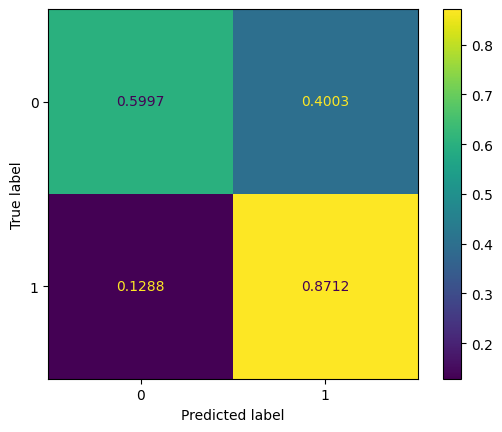

In [150]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test dataset
y_pred = rf_base.predict(X_test_norm)

# Display the normalized confusion matrix, showing the proportion of correct and incorrect predictions for each class
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', values_format='.4f')
plt.show()

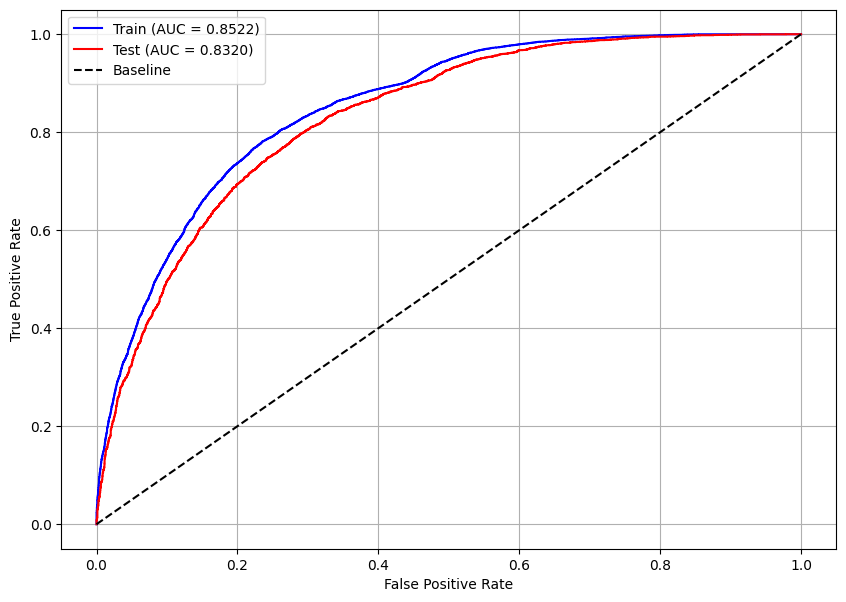

In [151]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Use the trained Random Forest model
model = rf_base

# Calculate probabilities of belonging to the positive class for training and test datasets
probas_train = model.predict_proba(X_train_norm)[:, 1]
probas_test = model.predict_proba(X_test_norm)[:, 1]

# Compute false positive rate (FPR) and true positive rate (TPR) for training and test datasets
fp_train, tp_train, _ = roc_curve(y_train, probas_train)
fp_test, tp_test, _ = roc_curve(y_test, probas_test)

# Create a figure with the specified size
plt.figure(figsize=(10, 7))

# Plot the ROC curve for the training data
plt.plot(fp_train, tp_train, 'b', label=f'Train (AUC = {auc(fp_train, tp_train):.4f})')

# Plot the ROC curve for the test data
plt.plot(fp_test, tp_test, 'r', label=f'Test (AUC = {auc(fp_test, tp_test):.4f})')

# Plot the baseline (diagonal) for reference
plt.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='Baseline',
         linestyle='--',
         color='k')

# Add labels to the x and y axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add a grid to the plot
plt.grid(True)

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

### <font color=#FF1493> **Under and Over**

In [152]:
# Displays the distribution of classes in the training dataset before balancing
y_train.value_counts()

,count
sobrevida_ano3,
1,13147
0,12070


#### **UnderSampling**

In [153]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler with a fixed random seed
r_under_samp = RandomUnderSampler(random_state=19)

# Apply undersampling to the training dataset, reducing the majority class
X_under, y_under = r_under_samp.fit_resample(X_train_norm, y_train)

# Display the new class distribution after undersampling
y_under.value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning:

`BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.



,count
sobrevida_ano3,
0,12070
1,12070


In [154]:
from sklearn.ensemble import RandomForestClassifier

# Create a new Random Forest model
rf_under = RandomForestClassifier(random_state=19)

# Train the model using the balanced data from undersampling
rf_under.fit(X_under, y_under)

RandomForestClassifier(random_state=19)

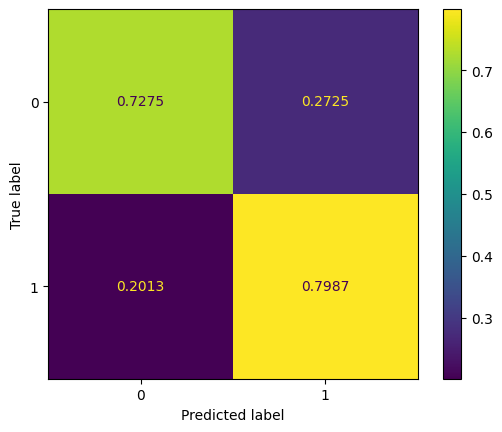

In [155]:
# Make predictions on the normalized test dataset
y_pred = rf_under.predict(X_test_norm)

# Display the normalized confusion matrix for the model with undersampling
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', values_format='.4f')
plt.show()

#### **OverSampling**

In [156]:
from imblearn.over_sampling import SMOTE

# Use the SMOTE function with a fixed random seed
smote = SMOTE(random_state=19)

# Apply oversampling to the training dataset, generating new samples for the minority class
X_over, y_over = smote.fit_resample(X_train_norm, y_train)

# Display the new class distribution after oversampling
y_over.value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning:

The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.



,count
sobrevida_ano3,
1,13147
0,13147


In [157]:
from sklearn.ensemble import RandomForestClassifier

# Create a new Random Forest model with a fixed random seed
rf_over = RandomForestClassifier(random_state=19)

# Train the model using the balanced data from oversampling
rf_over.fit(X_over, y_over)

RandomForestClassifier(random_state=19)

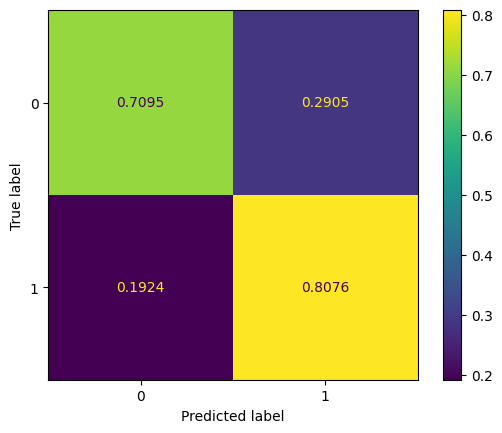

In [158]:
# Make predictions on the normalized test dataset
y_pred = rf_over.predict(X_test_norm)

# Display the normalized confusion matrix for the model with oversampling
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', values_format='.4f')
plt.show()

### <font color=#FF1493> **Weight in classes**

In [159]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model with specified class weights
## Class 0 (usually the minority class) is assigned a weight of 1.6305, and class 1 is assigned a weight of 1
### This instructs the model to penalize errors in class 0 more heavily
rf = RandomForestClassifier(random_state=19, max_depth=8, class_weight={0: 1.6305, 1: 1})

# Train the model using the training dataset
rf.fit(X_train_norm, y_train)

RandomForestClassifier(class_weight={0: 1.6305, 1: 1}, max_depth=8,
                       random_state=19)

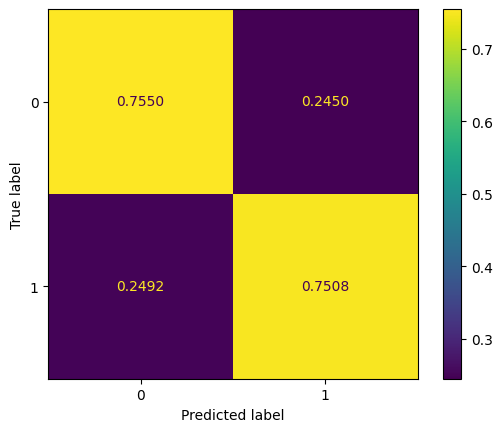

In [160]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test dataset
y_pred = rf.predict(X_test_norm)

# Display the normalized confusion matrix, showing the proportion of correct and incorrect predictions for each class
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true', values_format='.4f')
plt.show()

In [161]:
from sklearn.metrics import classification_report

# Display a detailed classification report, including precision, recall, and F1-score for each class
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7337    0.7550    0.7442      4004
           1     0.7711    0.7508    0.7608      4402

    accuracy                         0.7528      8406
   macro avg     0.7524    0.7529    0.7525      8406
weighted avg     0.7533    0.7528    0.7529      8406



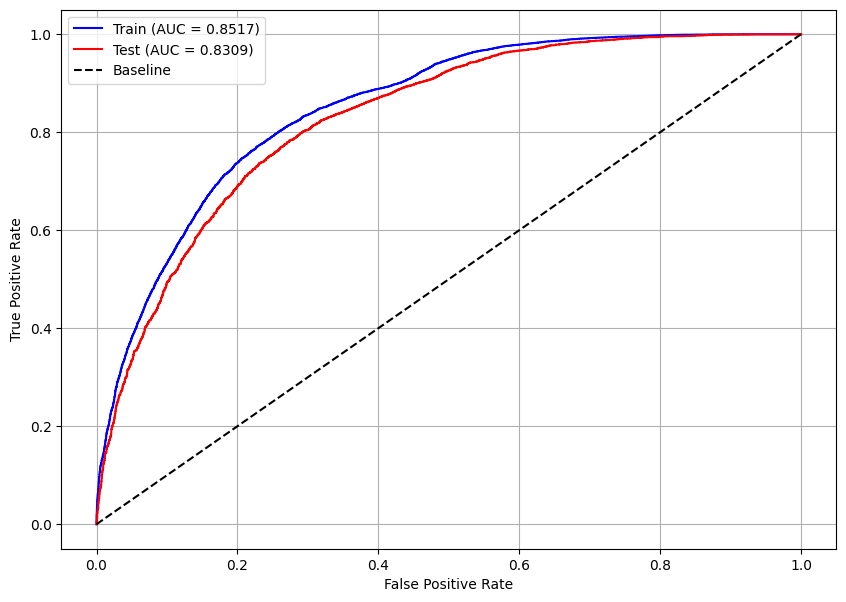

In [162]:
from sklearn.metrics import roc_curve, auc

# Use the trained Random Forest model
model = rf

# Calculate probabilities of belonging to the positive class for training and test datasets
probas_train = model.predict_proba(X_train_norm)[:, 1]
probas_test = model.predict_proba(X_test_norm)[:, 1]

# Compute false positive rate (FPR) and true positive rate (TPR) for training and test datasets
fp_train, tp_train, _ = roc_curve(y_train, probas_train)
fp_test, tp_test, _ = roc_curve(y_test, probas_test)

# Create a figure with the specified size
plt.figure(figsize=(10, 7))

# Plot the ROC curve for the training data
plt.plot(fp_train, tp_train, 'b', label=f'Train (AUC = {auc(fp_train, tp_train):.4f})')

# Plot the ROC curve for the test data
plt.plot(fp_test, tp_test, 'r', label=f'Test (AUC = {auc(fp_test, tp_test):.4f})')

# Plot the baseline (diagonal) for reference
plt.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='Baseline',
         linestyle='--',
         color='k')

# Add labels to the x and y axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add a grid to the plot
plt.grid(True)

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

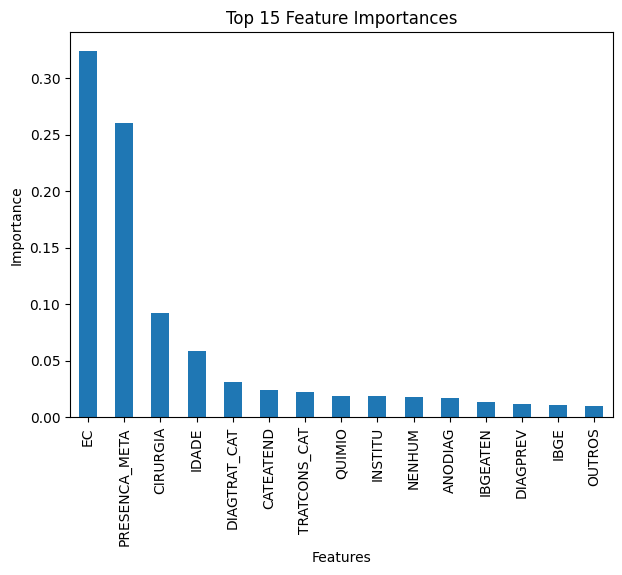

In [163]:
# Calculate feature importances and assign feature names
feat_import = pd.Series(rf.feature_importances_, index=X_train_ohe.columns)

# Display the top 15 most important features in a bar chart
feat_import.nlargest(15).plot(kind='bar', figsize=(7, 5))
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 15 Feature Importances')
plt.show()

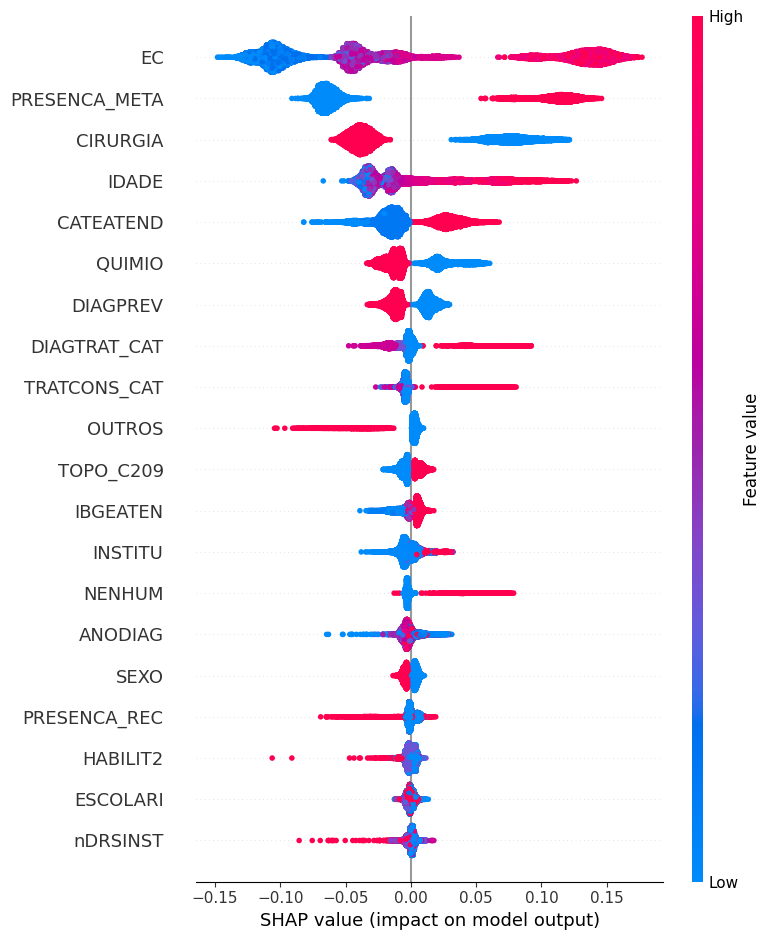

In [164]:
!pip install shap --quiet
import shap

# Calculate SHAP values for the Random Forest model
shap_values = shap.TreeExplainer(rf).shap_values(X_train_norm)

# Display the SHAP summary plot, showing the importance of each feature
shap.summary_plot(shap_values[:, :, 0], X_train_norm, feature_names=X_train_ohe.columns)

## <font color=#FFB90F>**Prediction of new data**

When a new patient dataset was received for survival prediction, the following steps were performed:

<font color=GOLD>1- Data Analysis:</font>

<font color=SkyBlue>1.1-</font> Loading the new dataset.

<font color=SkyBlue>1.2-</font> Checking the columns to ensure they are in the same format as the original dataset.

<font color=GOLD>2- Column Removal:</font>

Unnecessary columns that were not used in model training were removed. These were either predictor columns or columns with information irrelevant to the prediction process.

<font color=GOLD>3- Encoding Categorical Variables:</font>

Categorical variables were encoded using the previously trained OrdinalEncoder from the original training dataset.

<font color=GOLD>4- Normalization:</font>

Normalization was applied using the previously fitted MinMaxScaler from the original training dataset.

<font color=GOLD>5- Prediction:</font>

After completing all preprocessing steps, the pre-trained model (in this case, a Random Forest with class weights) was used to make predictions on the normalized data.

<font color=GOLD>6- Results Analysis:</font>

Predictions were made for the new dataset, and the model's accuracy in predicting outcomes was evaluated, showing high precision.

<font color=RED>Note:</font> When new data is received for predictions, there is no need to train or fit the model again because it has already been trained and tuned with previous data. The sole purpose is to make predictions on the new data using the pre-existing prediction model.

In [165]:
!gdown 1qWpFTYMN1O2GV_rVGFamYo7aKIHiCDj8 --quiet # New

In [166]:
# New database
dados_novos = pd.read_csv('/content/dados_novos.csv')
dados_novos.head()

,INSTITU,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,DIAGPREV,TOPO,EC,ECGRUP,...,nDRS,nDRSINST,ULTIDIAG,CONSDIAG_CAT,TRATCONS_CAT,DIAGTRAT_CAT,PRESENCA_META,PRESENCA_REC,obito_geral,sobrevida_ano3
0,20737,4,58,1,3537305,9,2,C184,IV,IV,...,2,5,106,0,0,0,1,0,1,0
1,16624,3,48,2,3550308,2,2,C209,IVB,IV,...,1,1,1517,0,0,0,1,0,1,1
2,208422,2,53,2,3546306,2,2,C209,III,III,...,14,14,2573,0,0,0,0,1,1,1
3,16772,9,75,1,3516408,9,1,C209,IV,IV,...,1,1,184,0,0,0,1,0,1,0
4,9326,9,51,2,3525904,9,2,C209,IV,IV,...,7,7,55,0,0,0,1,0,1,0


In [167]:
# Format of the new DataFrame
dados_novos.shape

(10, 32)

In [168]:
# Database columns
dados_novos.columns

Index(['INSTITU', 'ESCOLARI', 'IDADE', 'SEXO', 'IBGE', 'CATEATEND', 'DIAGPREV',
       'TOPO', 'EC', 'ECGRUP', 'NENHUM', 'CIRURGIA', 'RADIO', 'QUIMIO',
       'HORMONIO', 'TMO', 'IMUNO', 'OUTROS', 'ULTINFO', 'ANODIAG', 'IBGEATEN',
       'HABILIT2', 'nDRS', 'nDRSINST', 'ULTIDIAG', 'CONSDIAG_CAT',
       'TRATCONS_CAT', 'DIAGTRAT_CAT', 'PRESENCA_META', 'PRESENCA_REC',
       'obito_geral', 'sobrevida_ano3'],
      dtype='object')

In [169]:
# Separating the true target column before removing unnecessary columns
y_real_novos = dados_novos['sobrevida_ano3'].copy()

# Removing unnecessary columns
colunas_excluir = ['ECGRUP', 'ULTIDIAG', 'ULTINFO', 'obito_geral', 'sobrevida_ano3']
dados_novos = dados_novos.drop(columns=colunas_excluir, errors='ignore')

# Applying Ordinal Encoder to the 'EC' column
dados_novos[['EC']] = oe.transform(dados_novos[['EC']])

# Applying One Hot Encoder to the 'TOPO' column
ohe_results_novos = ohe.transform(dados_novos[['TOPO']]).toarray()
df_aux_novos = pd.DataFrame(
    ohe_results_novos,
    index=dados_novos.index,
    columns=ohe.get_feature_names_out()
)

# Merging the one-hot encoded data with the main DataFrame
dados_novos = dados_novos.merge(df_aux_novos, how='left', left_index=True, right_index=True)
dados_novos.drop(columns=['TOPO'], inplace=True)

# Normalizing the new data using the MinMaxScaler fitted on the training dataset
dados_novos_norm = mms.transform(dados_novos)

In [170]:
# Predicting 3-year survival for the new patients
y_pred_novos = rf.predict(dados_novos_norm)

# Survival probabilities
y_proba_novos = rf.predict_proba(dados_novos_norm)[:, 1]

# Results
print("3-Year Survival Prediction:", y_pred_novos)
print("Survival Probabilities:", y_proba_novos)

3-Year Survival Prediction: [0 0 1 0 0 1 1 0 1 1]
Survival Probabilities: [0.11405624 0.2412328  0.60087407 0.10847774 0.15571974 0.61301322
 0.72135747 0.2926399  0.59196992 0.67271806]


In [171]:
# Create a list of patient identifiers
pacientes = [f'Paciente {i}' for i in range(1, 11)]

# Predictions from the model
previsoes = y_pred_novos

# Actual survival data
dados_reais = y_real_novos.values

# Create a DataFrame for comparison
df_comparacao = pd.DataFrame({
    'Paciente': pacientes,
    'Previsão do Modelo': previsoes,
    'Dado Real': dados_reais
})

# Display the comparison DataFrame
display(df_comparacao)

,Paciente,Previsão do Modelo,Dado Real
0,Paciente 1,0,0
1,Paciente 2,0,1
2,Paciente 3,1,1
3,Paciente 4,0,0
4,Paciente 5,0,0
5,Paciente 6,1,0
6,Paciente 7,1,1
7,Paciente 8,0,0
8,Paciente 9,1,1
9,Paciente 10,1,1


In [172]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Comparing predictions with actual values
accuracy = accuracy_score(y_real_novos, y_pred_novos)
precision = precision_score(y_real_novos, y_pred_novos)
recall = recall_score(y_real_novos, y_pred_novos)
f1 = f1_score(y_real_novos, y_pred_novos)

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8000
Precision: 0.8000
Recall: 0.8000
F1-Score: 0.8000


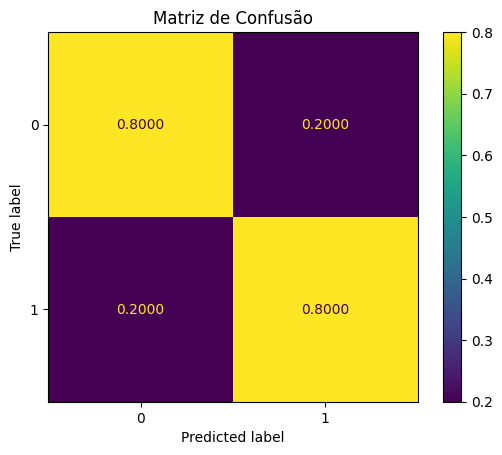

In [173]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_real_novos, y_pred_novos, normalize='true', values_format='.4f')
plt.title("Matriz de Confusão")
plt.show()